In [1]:
import pickle
import pandas as pd

articles = pd.read_csv("resources/merged.csv", sep="\t")

with open("models_storage/merged_csv_ms/vectorizer.pkl","rb") as file:
    tfidf_vectorizer = pickle.load(file)

with open("models_storage/merged_csv_ms/bow.pkl","rb") as file:
    tfidf_wm = pickle.load(file)

with open("models_storage/merged_csv_ms/classifier.pkl","rb") as file:
    sgdc_classifier = pickle.load(file)

with open("models_storage/merged_csv_ms/words_pa.pkl","rb") as file:
    words_pa = pickle.load(file)

from model.features import f_importances

tfidf_tokens = tfidf_vectorizer.get_feature_names_out()

key_anti_words, key_pro_words = f_importances(sgdc_classifier.coef_,tfidf_tokens, limit=50)

from preprocessing.vectors import find_close_words

key_words = [s for _,s in key_pro_words + key_anti_words]
close_words = find_close_words(words_pa,key_words)
pro_words_pa = [words for i,words in enumerate(words_pa) if articles["label"][i]==1]
anti_words_pa = [words for i,words in enumerate(words_pa) if articles["label"][i]==0]
vector_colors = ['r' if i>len(key_pro_words) else 'g' for i,_ in enumerate(key_words)]

from preprocessing.article import random_percent

anti_knowledge_data,_ = random_percent(anti_words_pa,0.8)
pro_knowledge_data,_ = random_percent(pro_words_pa,0.8)
all_knowledge_data_1, anti_read_data = random_percent(anti_words_pa,0.5*0.8)
all_knowledge_data_2, pro_read_data = random_percent(pro_words_pa,0.5*0.8)

all_knowledge_data = all_knowledge_data_1 + all_knowledge_data_2

from simulation.Simulation import Simulation

training...
 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 0.7094662089816914
plotting...


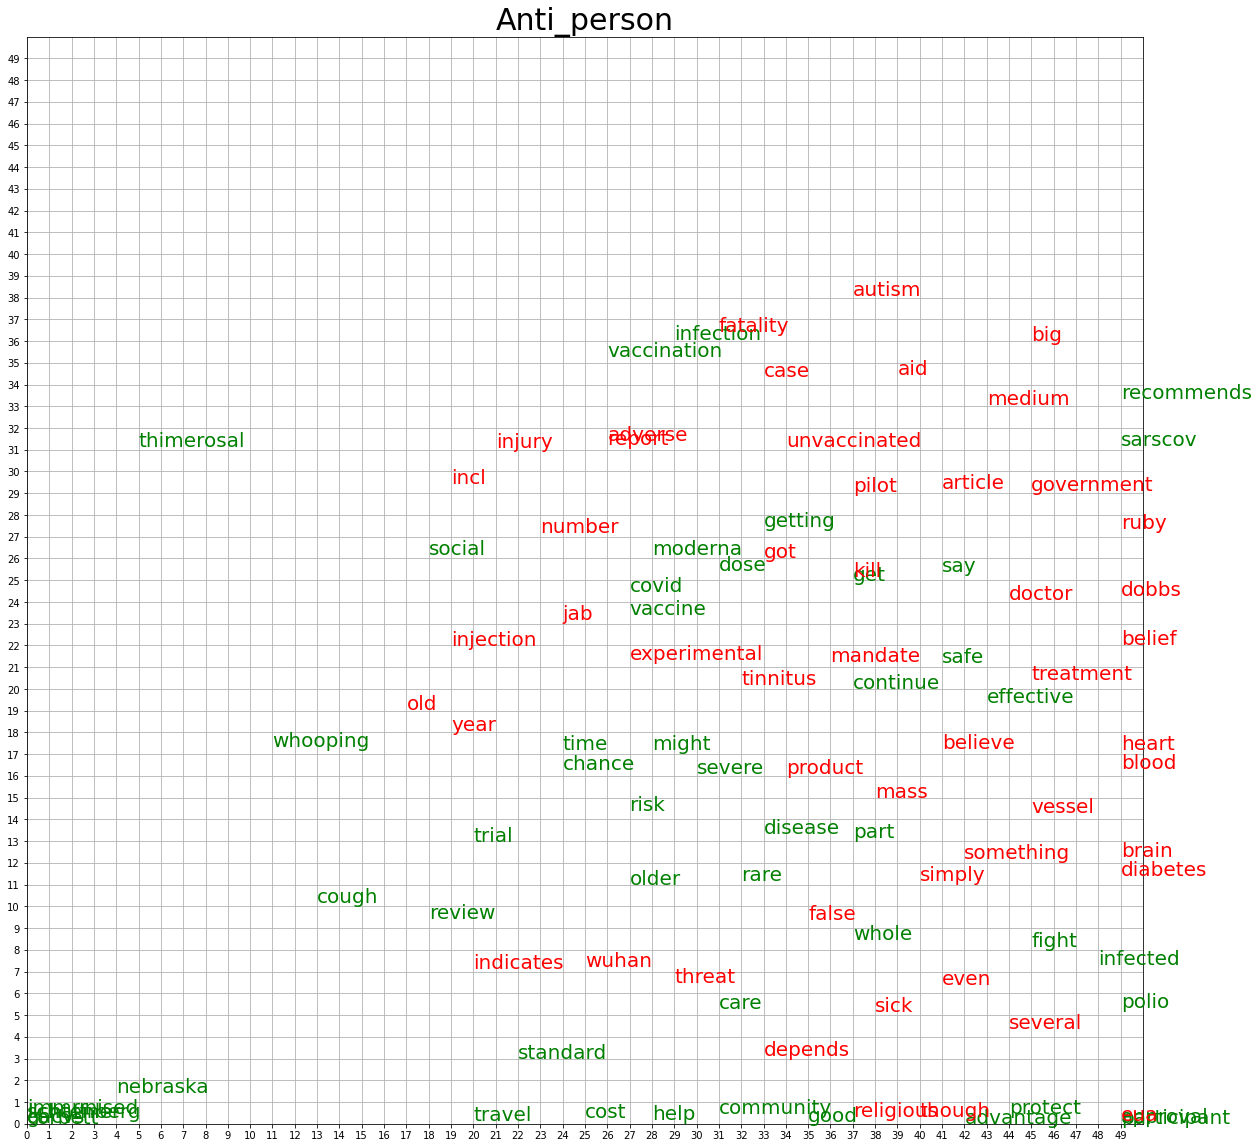

In [2]:
anti_person = Simulation("Anti_person",anti_knowledge_data, key_words, close_words)

learning rate = 0.01
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8986596042783759
plotting...
learning rate = 0.05
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8877509349428678
plotting...
learning rate = 0.1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8767602343865957
plotting...
learning rate = 0.15
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8602997533321995
plotting...
learning rate = 0.25
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8386786901027021
plotting...
learning rate = 0.5
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8044942477990468
plotting...
learning rate = 1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.7950497377536284
plotting...


knowledge          0.01          0.05           0.1  \
sum_pro    56590.453410  42282.002717  52585.691538  61977.459946   
mean_pro      23.307436     17.328690     21.498647     25.400598   
sum_anti   45377.308179  54406.540407  59070.581622  66539.318053   
mean_anti     18.536482     22.482041     24.348962     27.382435   

                   0.15          0.25           0.5             1  
sum_pro    67247.976676  73707.832935  70795.343189  67262.240519  
mean_pro      27.515539     30.183388     29.038287     27.702735  
sum_anti   69563.369867  73268.137082  73906.792569  79620.510510  
mean_anti     28.626901     30.351341     30.414318     32.792632

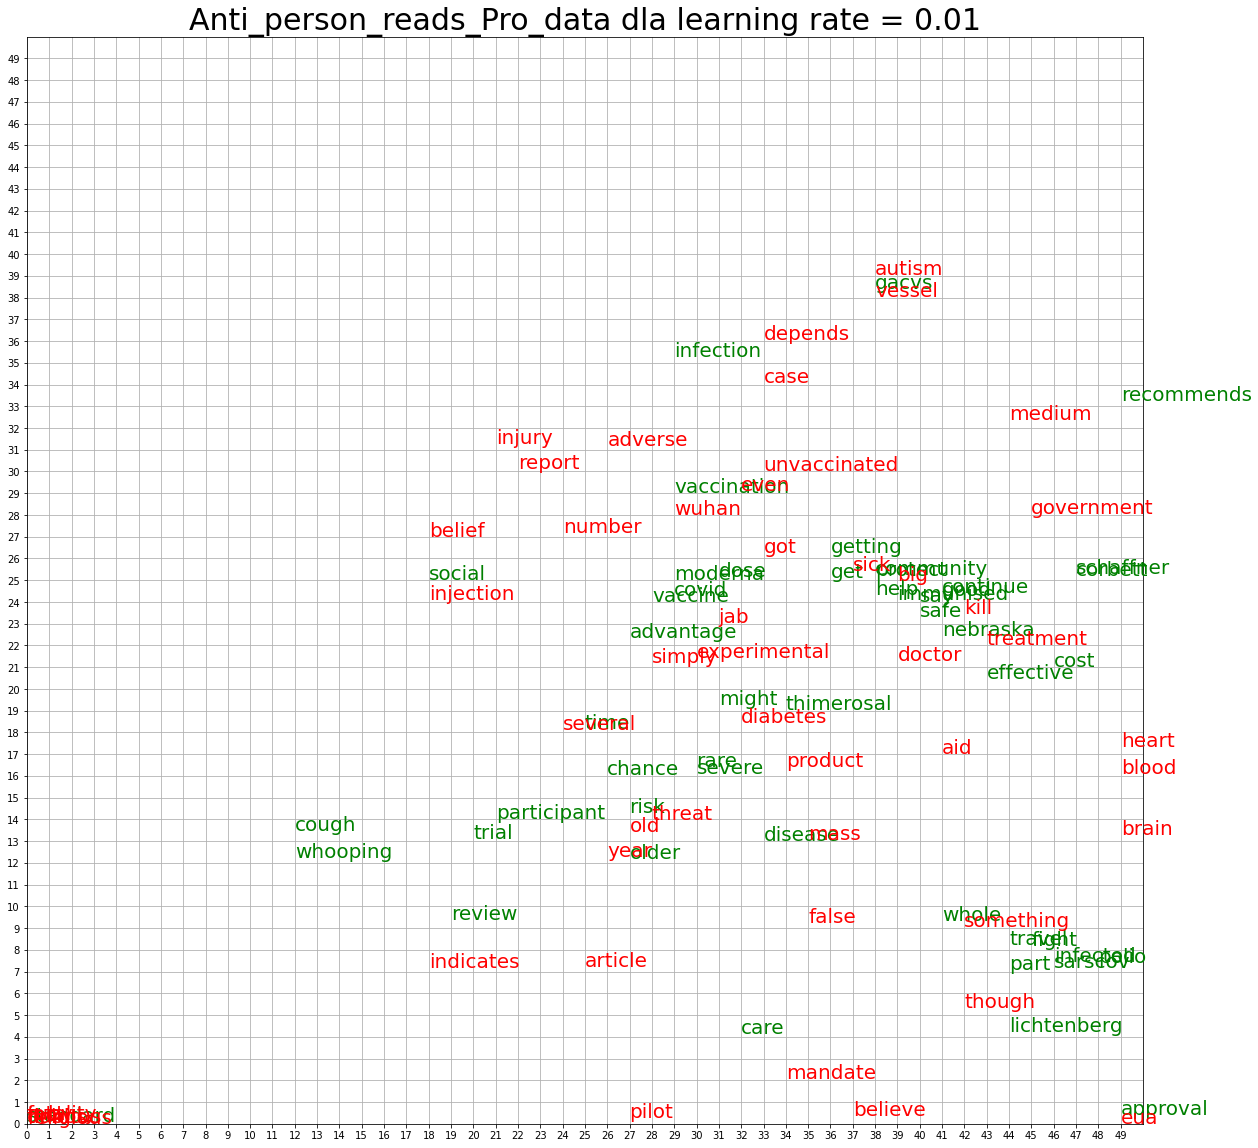

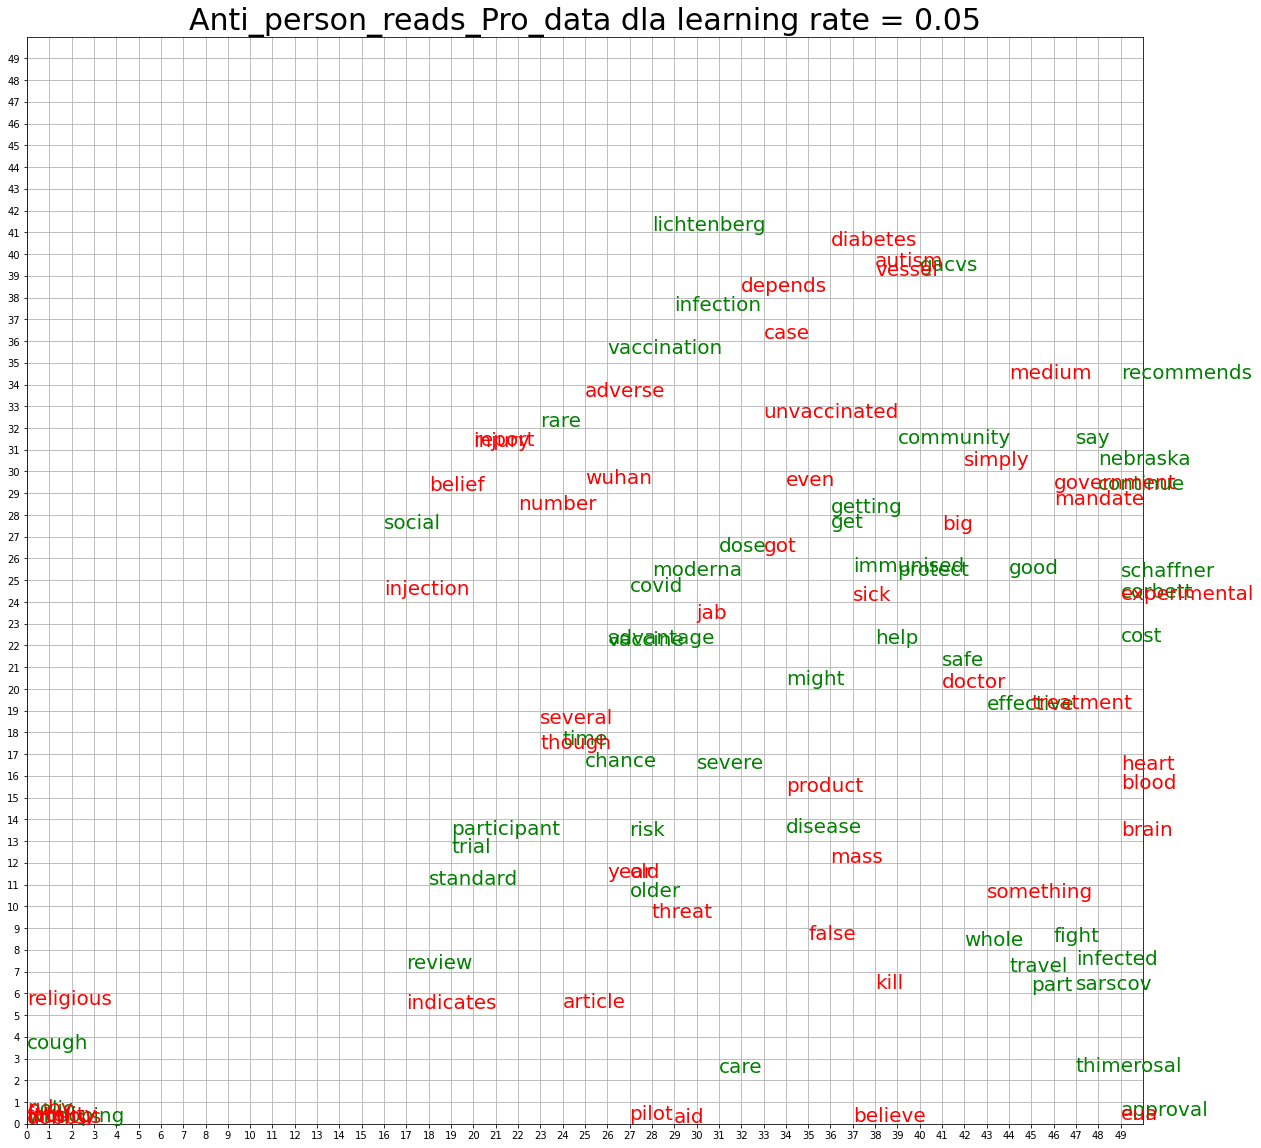

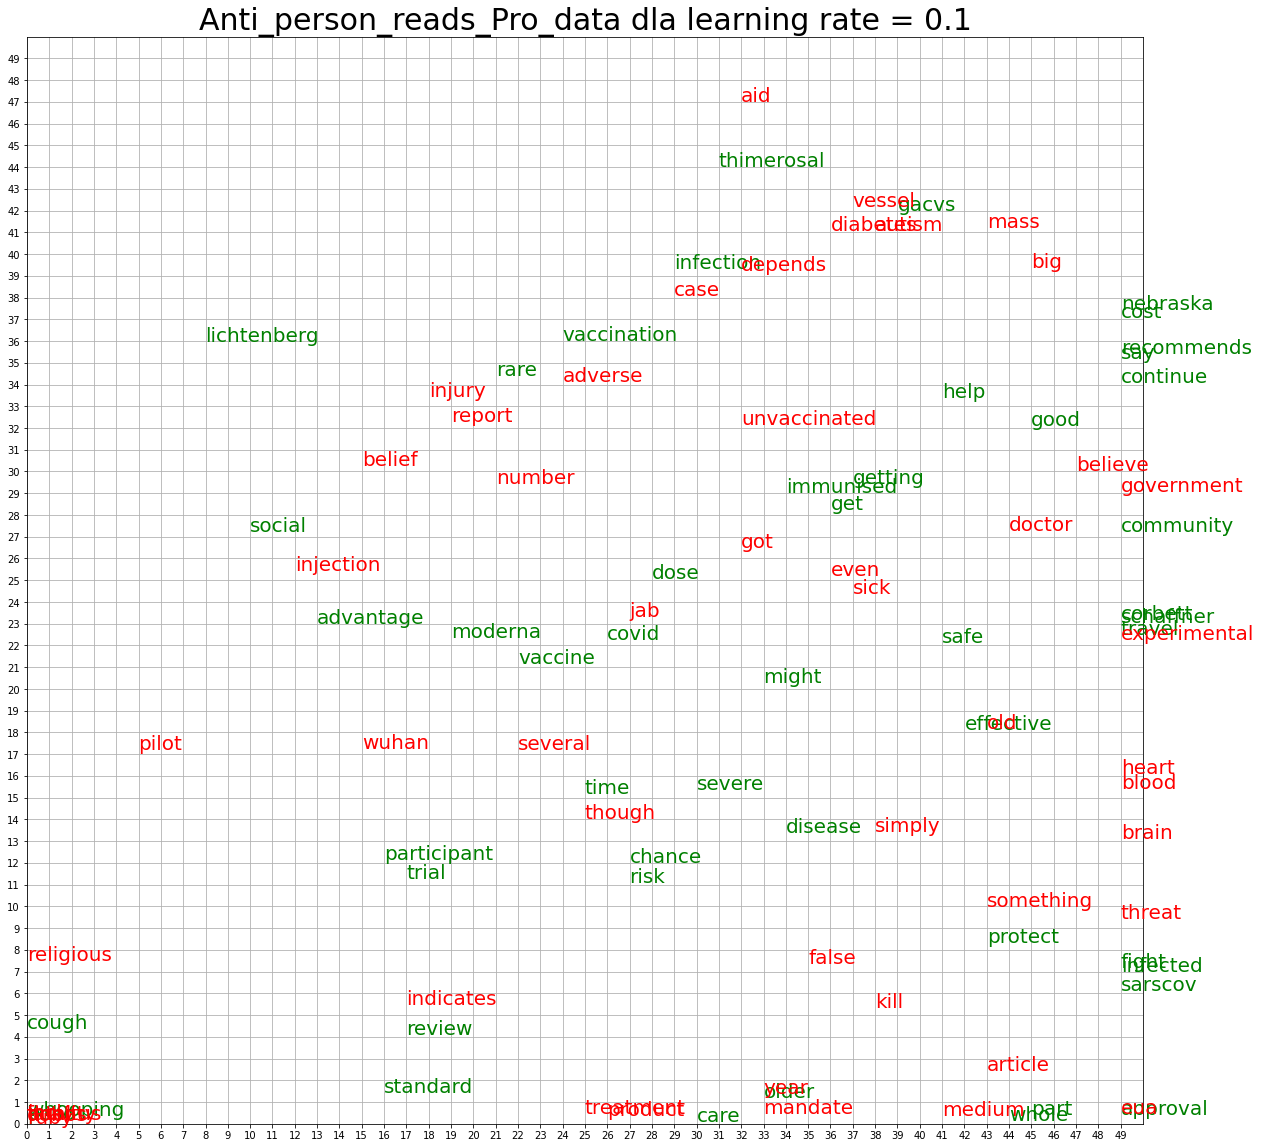

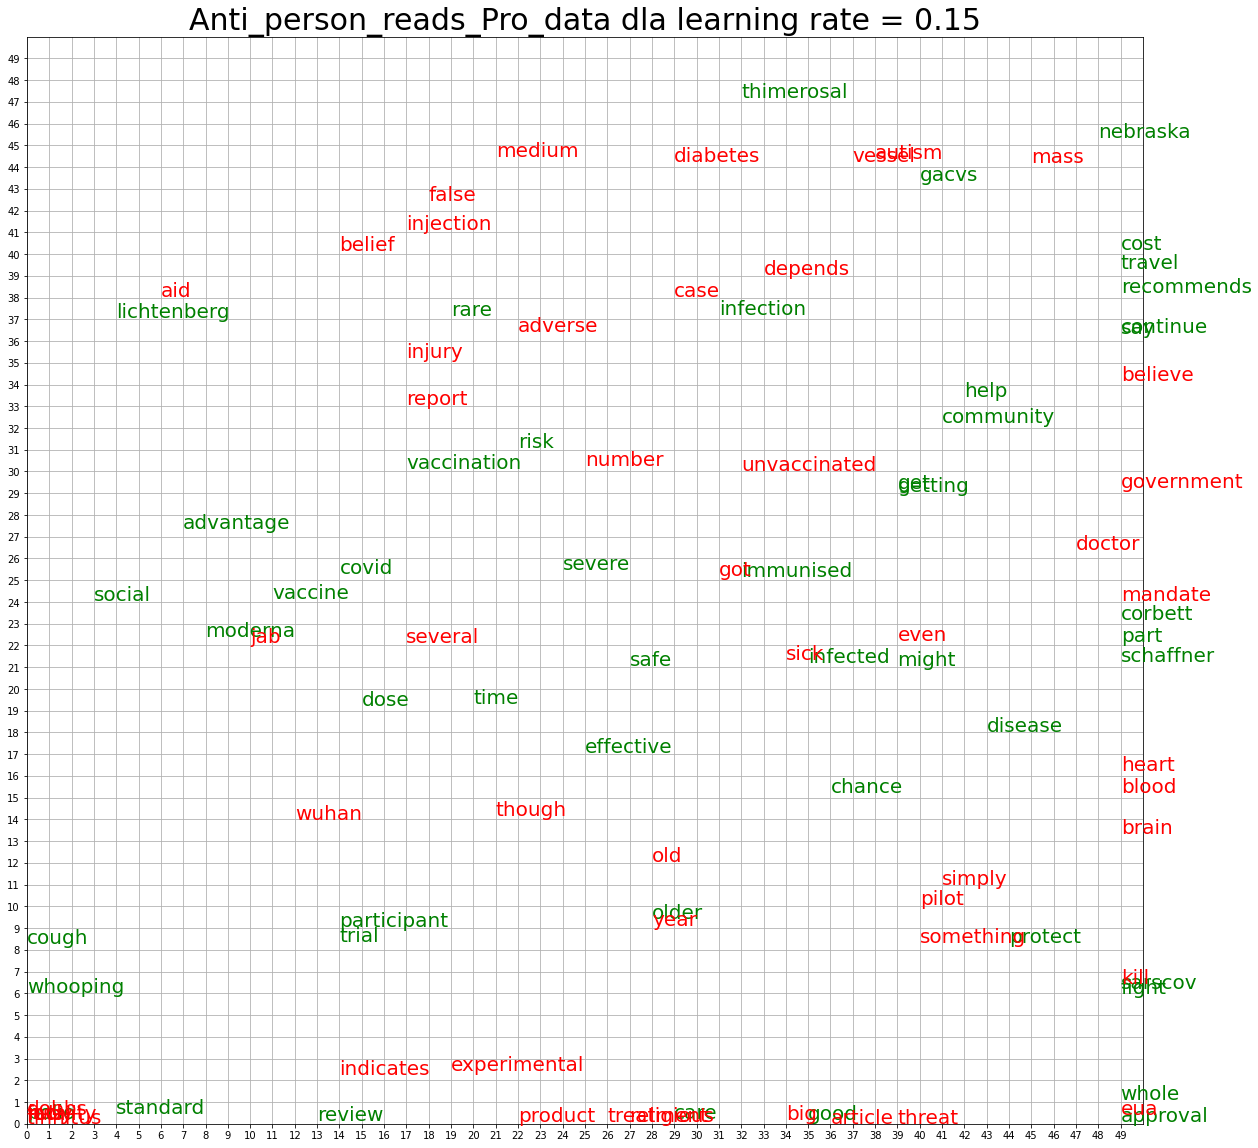

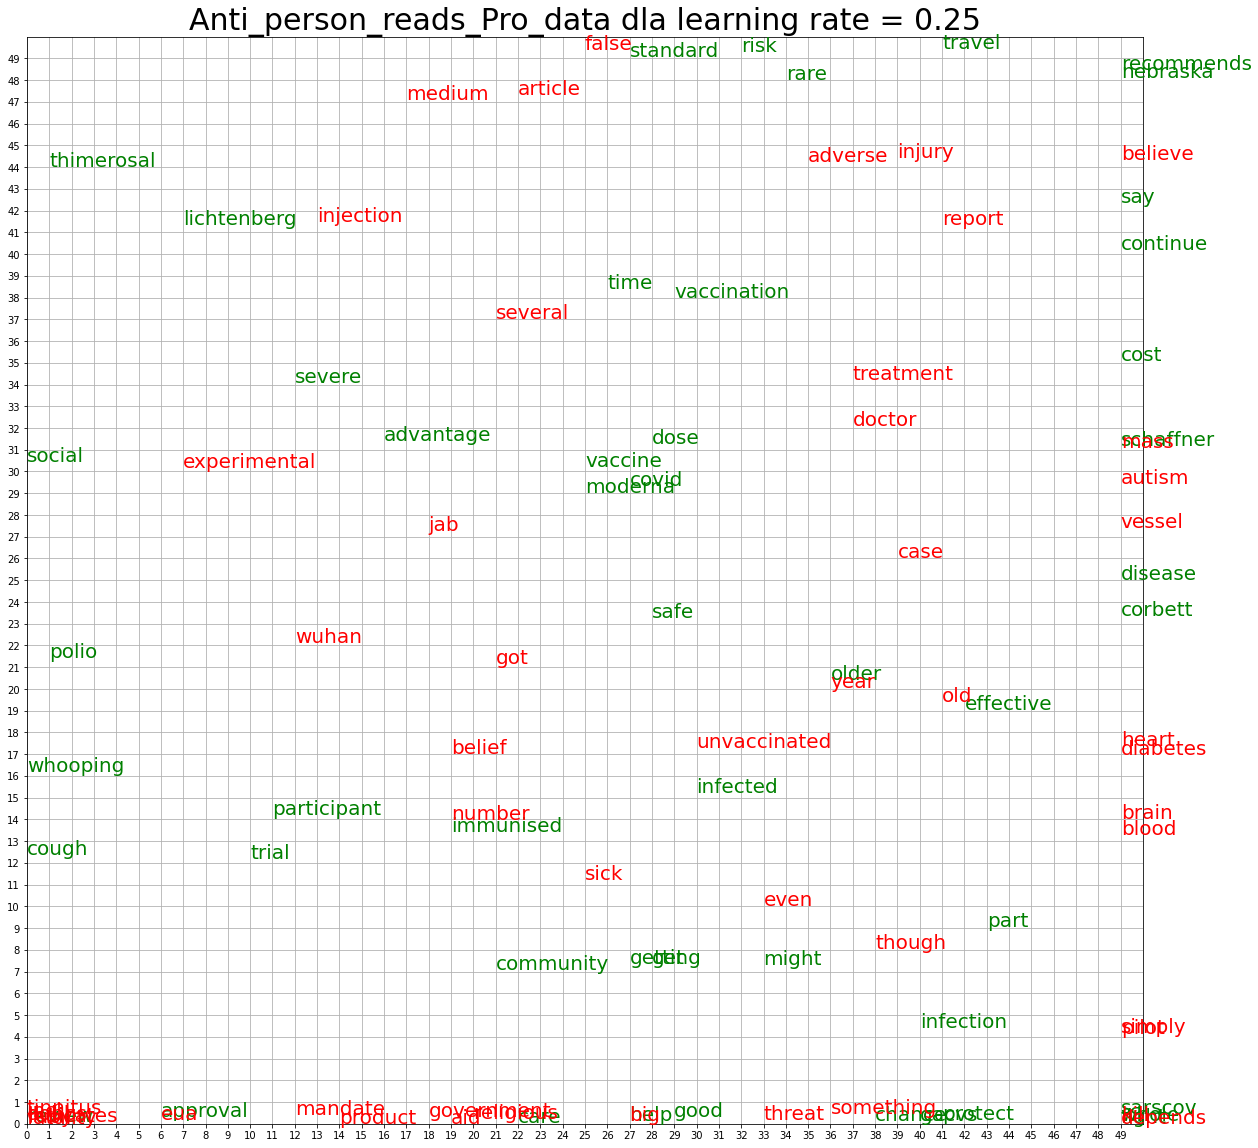

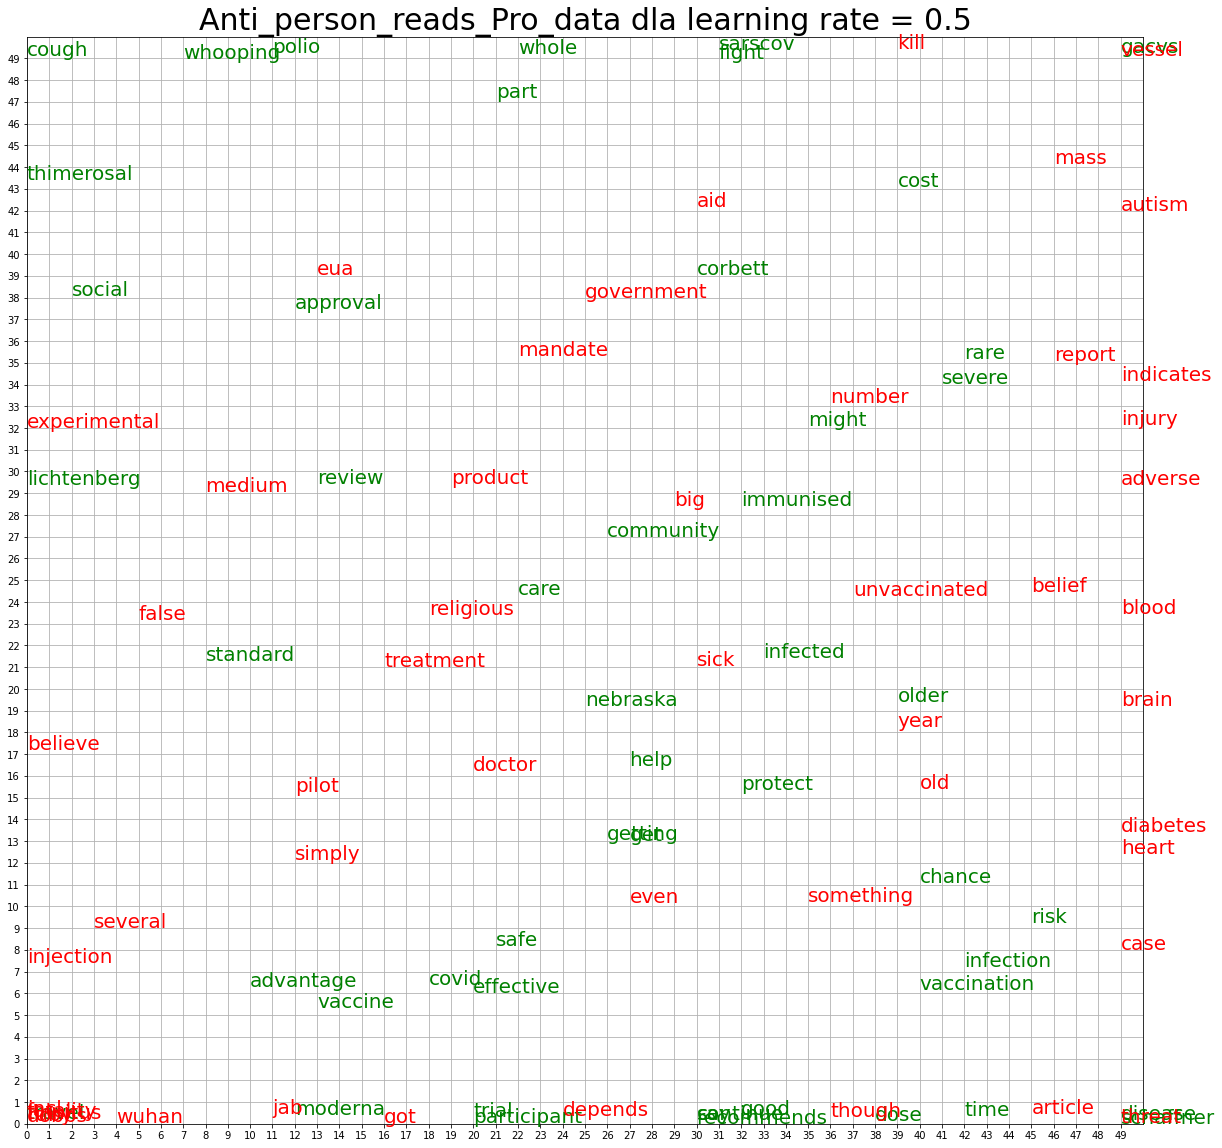

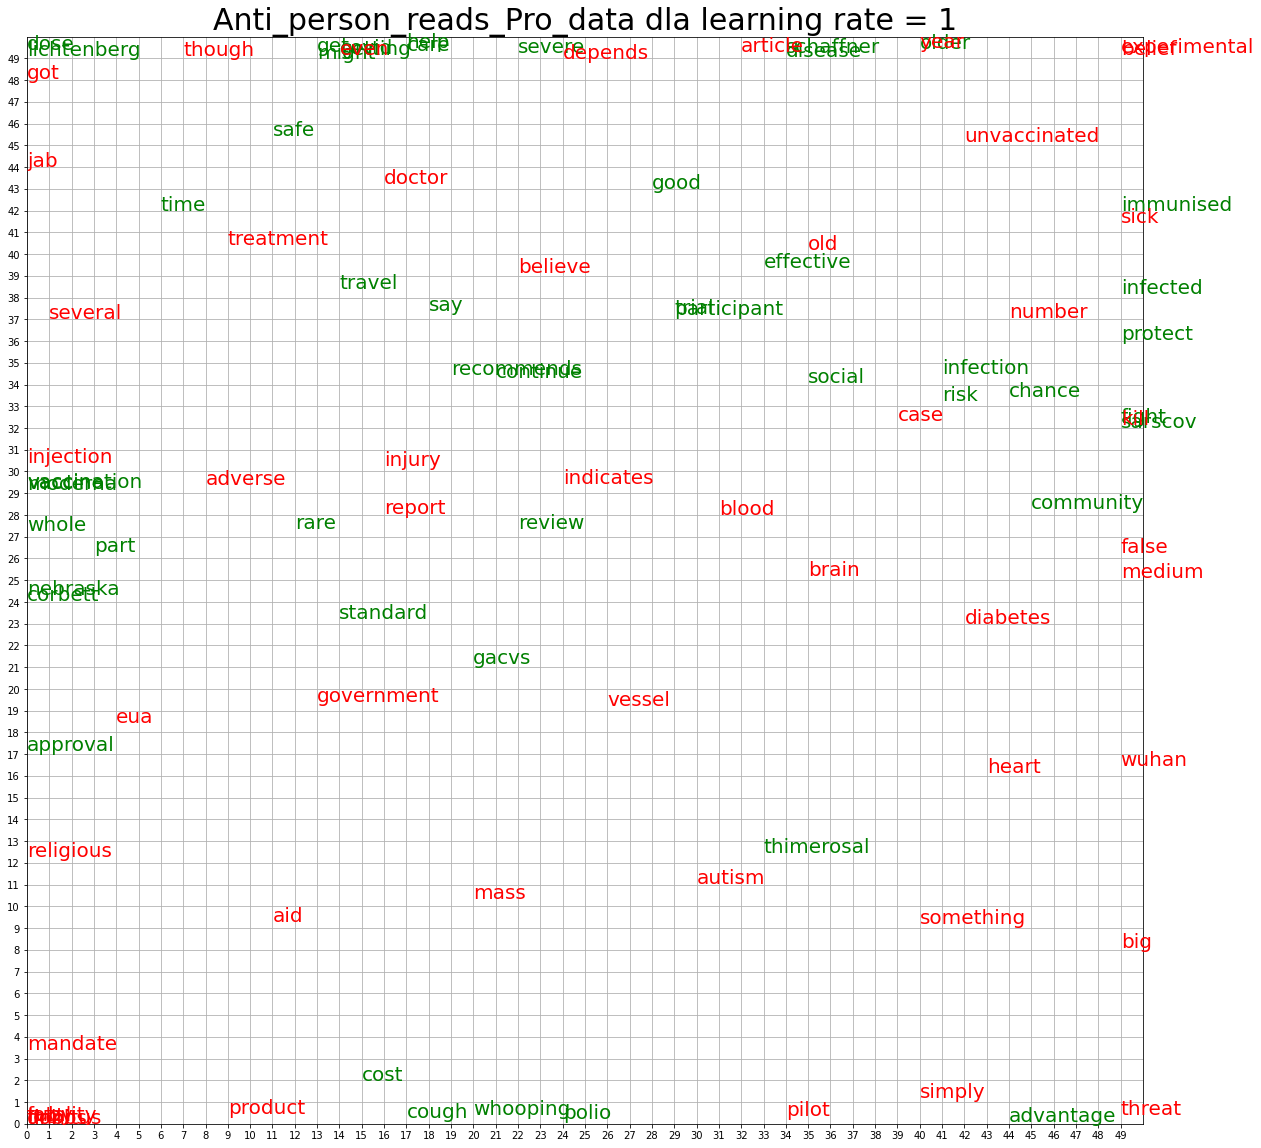

In [4]:
anti_person.run(pro_knowledge_data,"Pro_data")

training...
 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 0.7247187044343424
plotting...
learning rate = 0.01
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.9081783879321688
plotting...
learning rate = 0.05
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8930302960378965
plotting...
learning rate = 0.1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8820043831237308
plotting...
learning rate = 0.15
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8674548522728361
plotting...
learning rate = 0.25
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8451348595456035
plotting...
learning rate = 0.5
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8078529218844612
plotting...
learning rate = 1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.7866851319751269
plotting...


knowledge          0.01          0.05           0.1  \
sum_pro    44275.986062  46041.245258  52291.935541  61595.718595   
mean_pro      18.101384     18.962622     21.590395     25.945964   
sum_anti   52085.057106  37965.335690  43812.753808  50375.502548   
mean_anti     21.522751     15.585113     17.897367     20.679599   

                   0.15          0.25           0.5             1  
sum_pro    69067.935276  74764.897403  83389.801574  75053.456770  
mean_pro      28.850432     30.971374     34.572886     31.065173  
sum_anti   56400.792567  60929.809680  65230.950852  68255.376667  
mean_anti     23.096148     24.909979     26.646630     27.859337

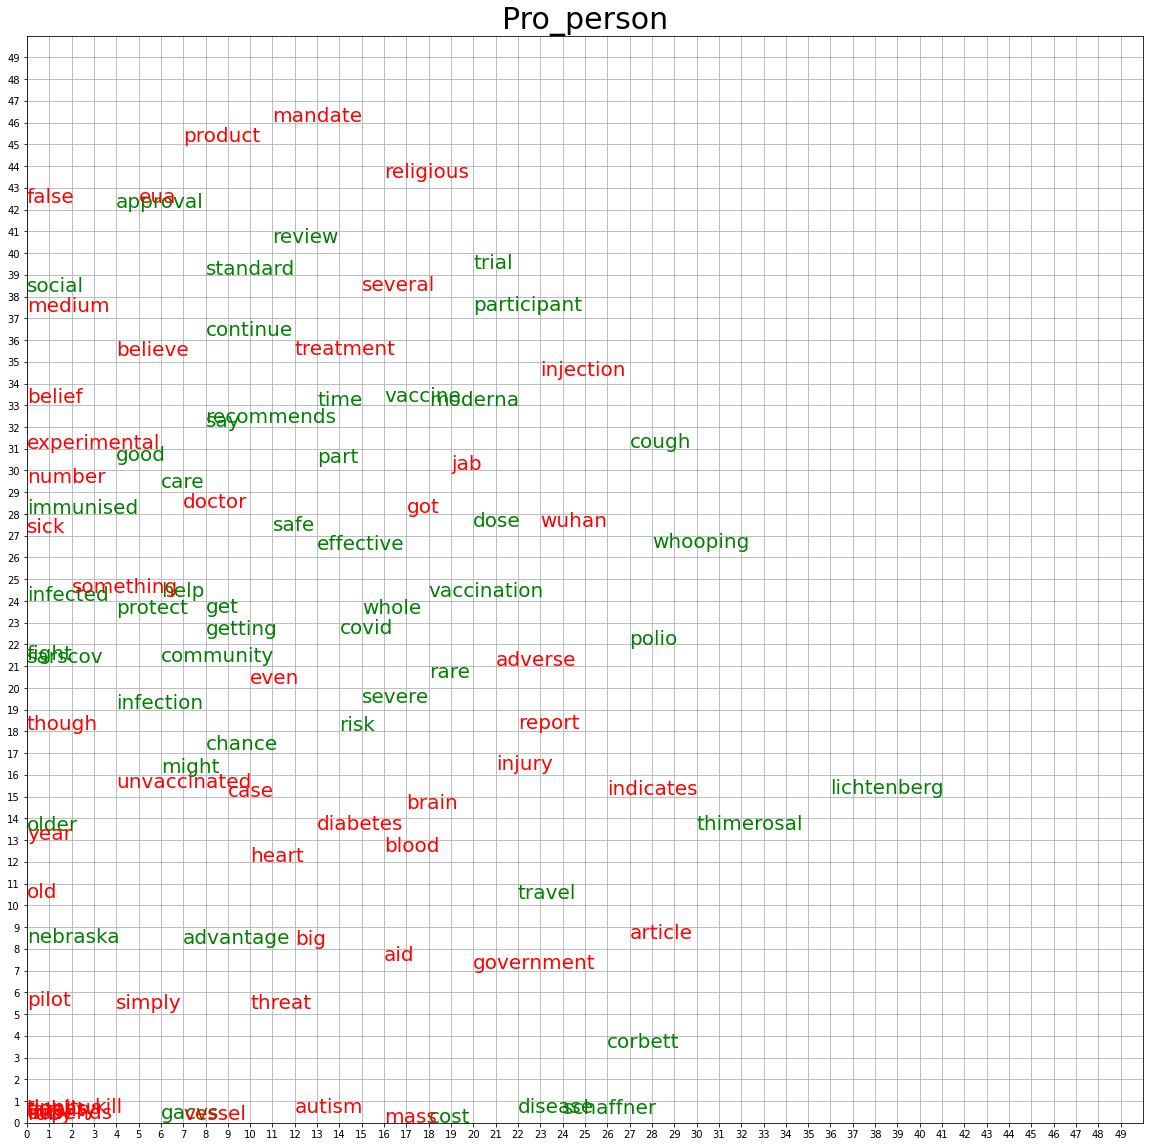

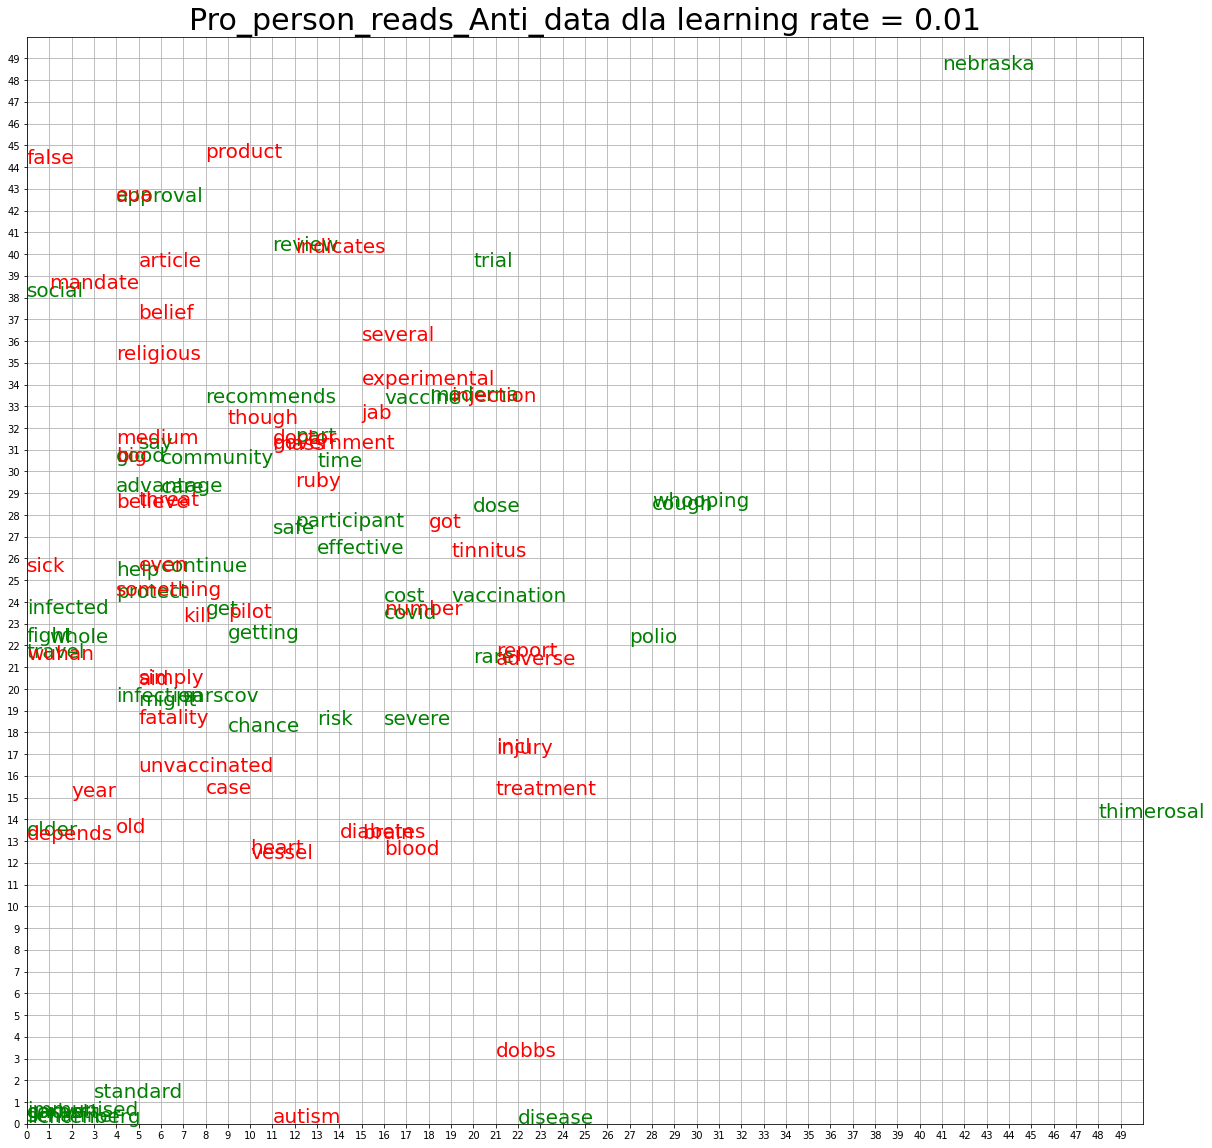

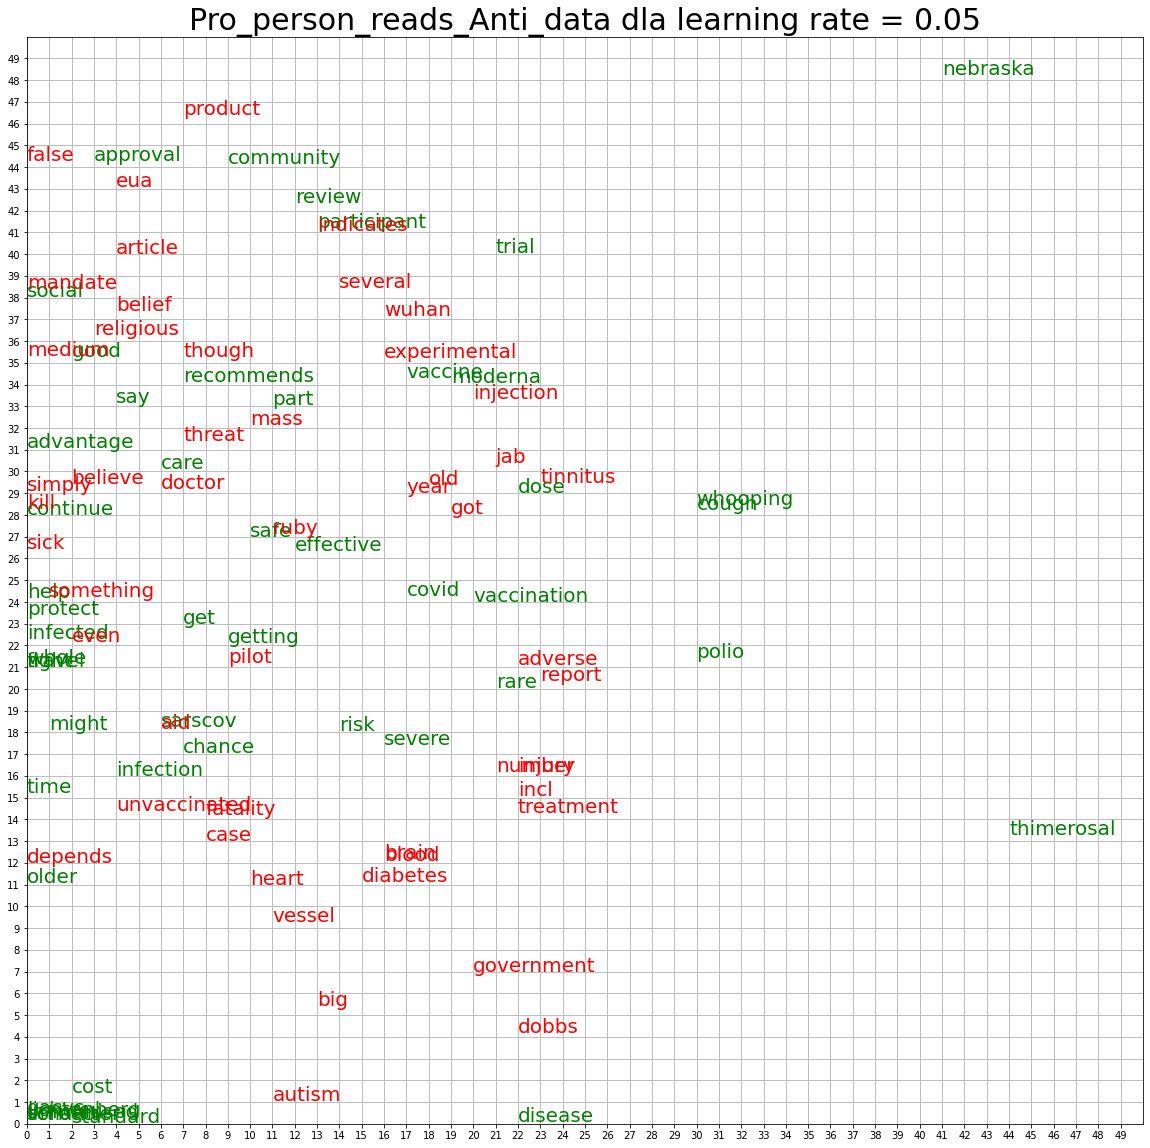

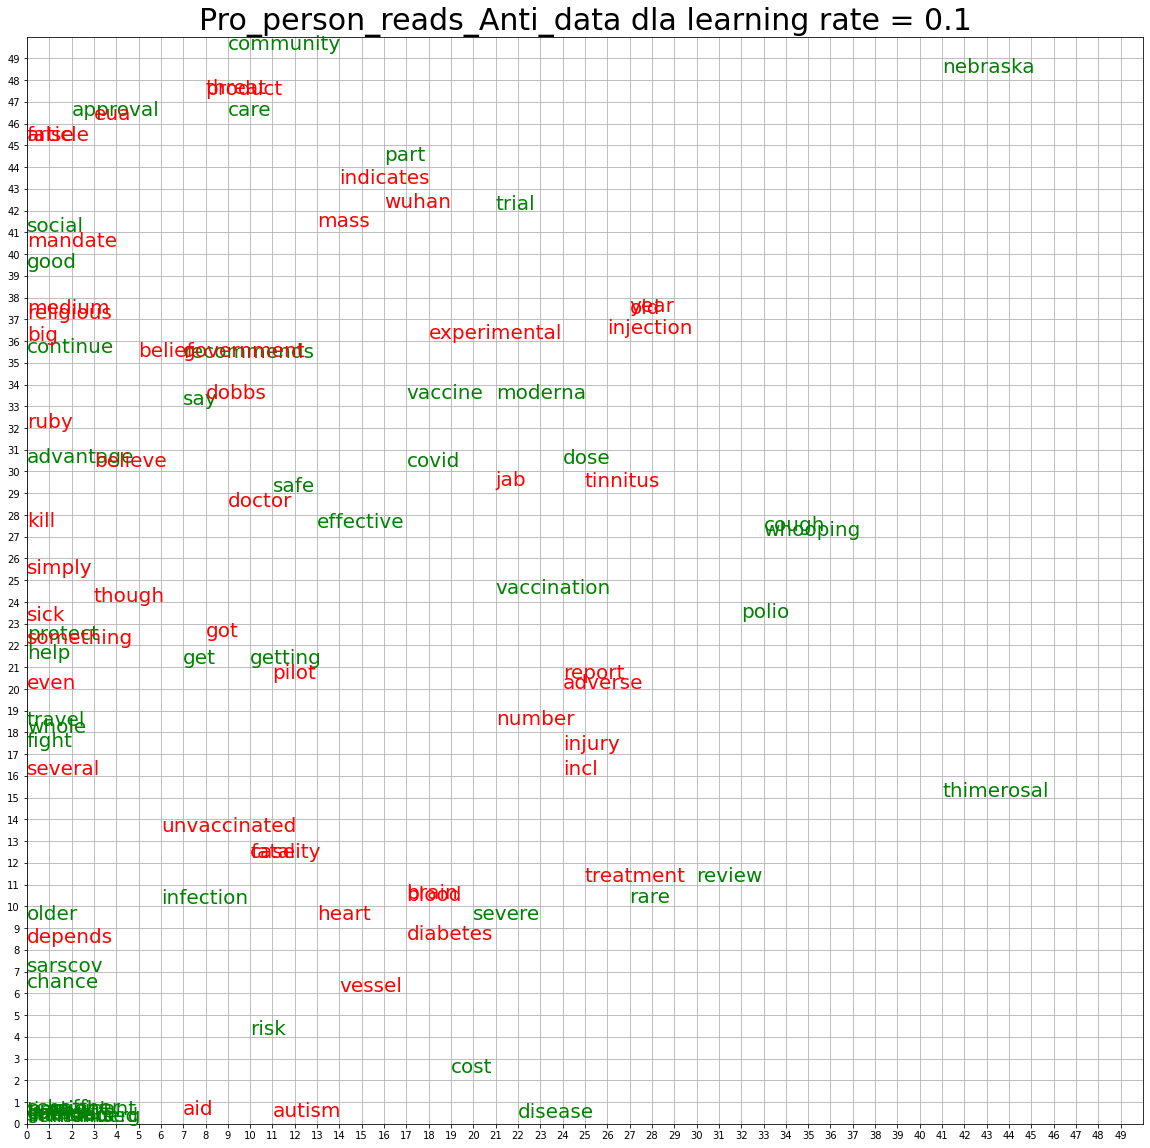

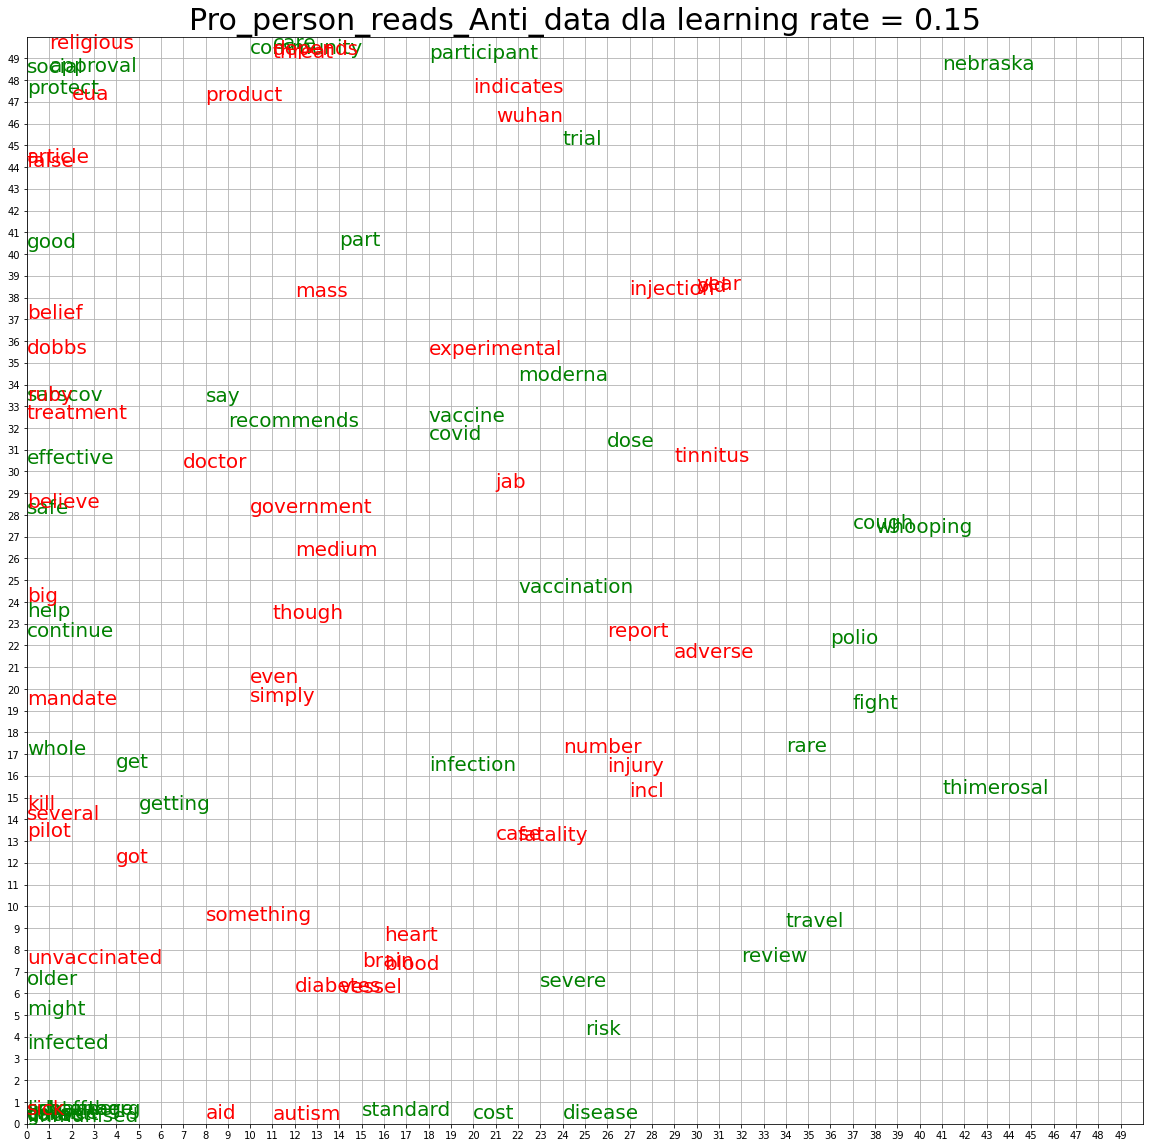

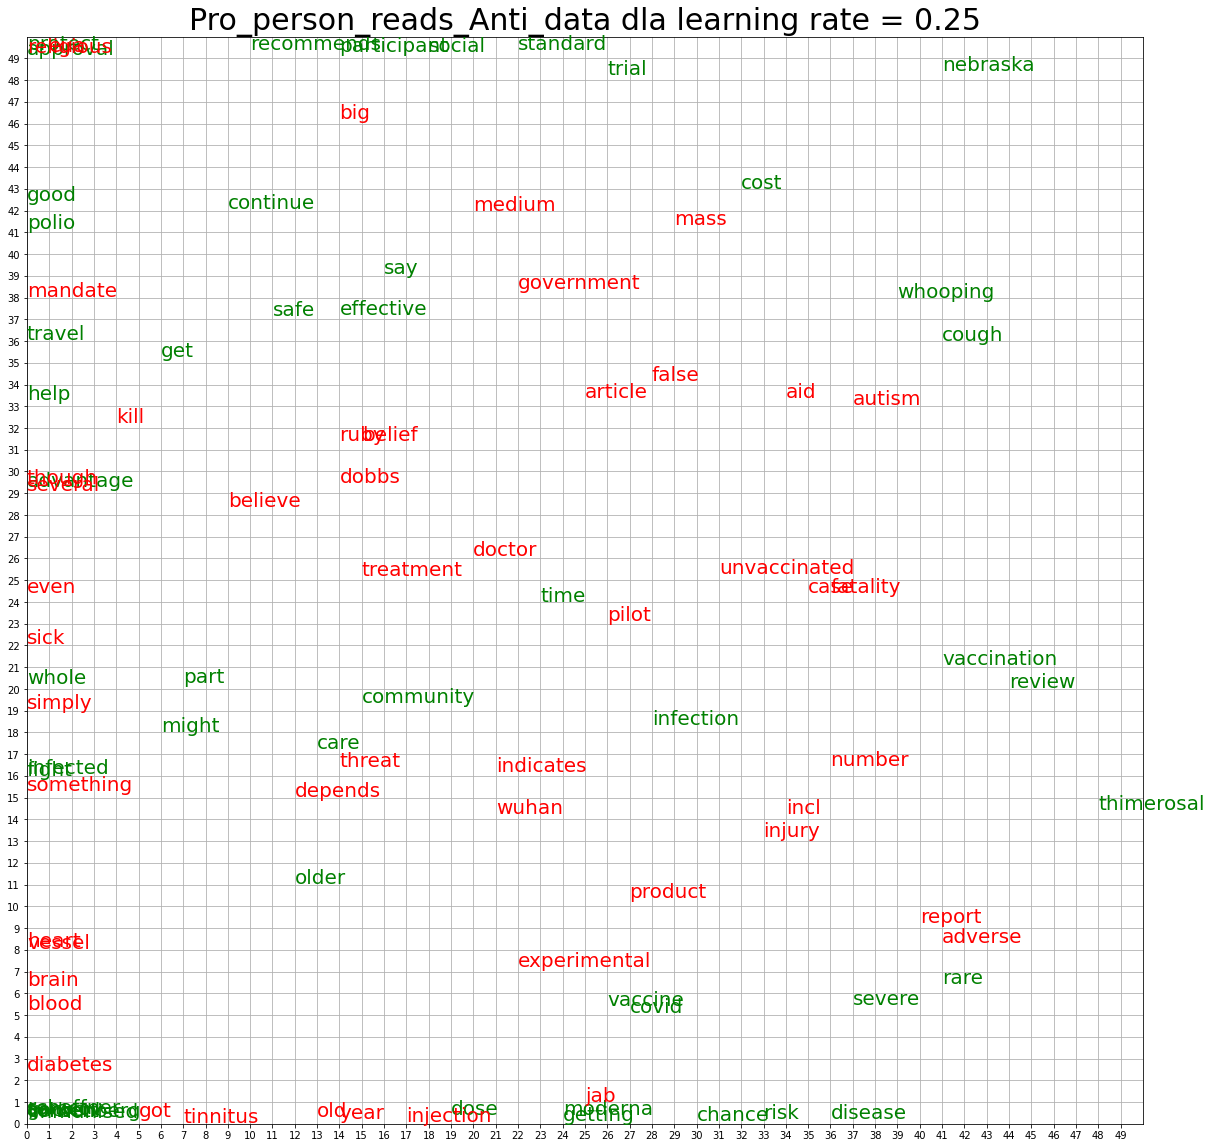

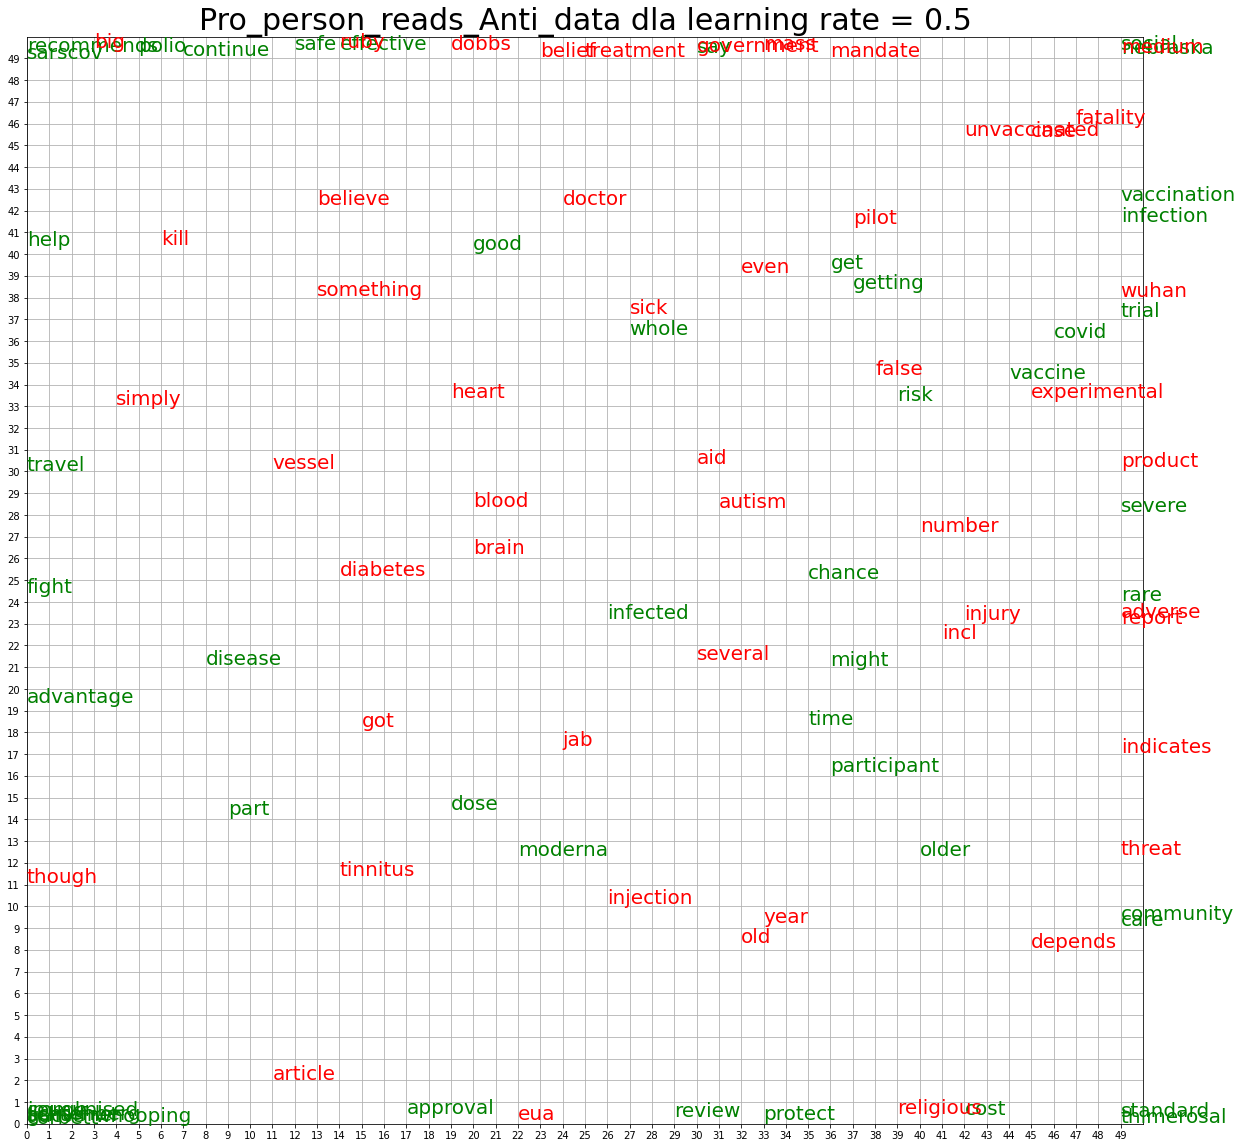

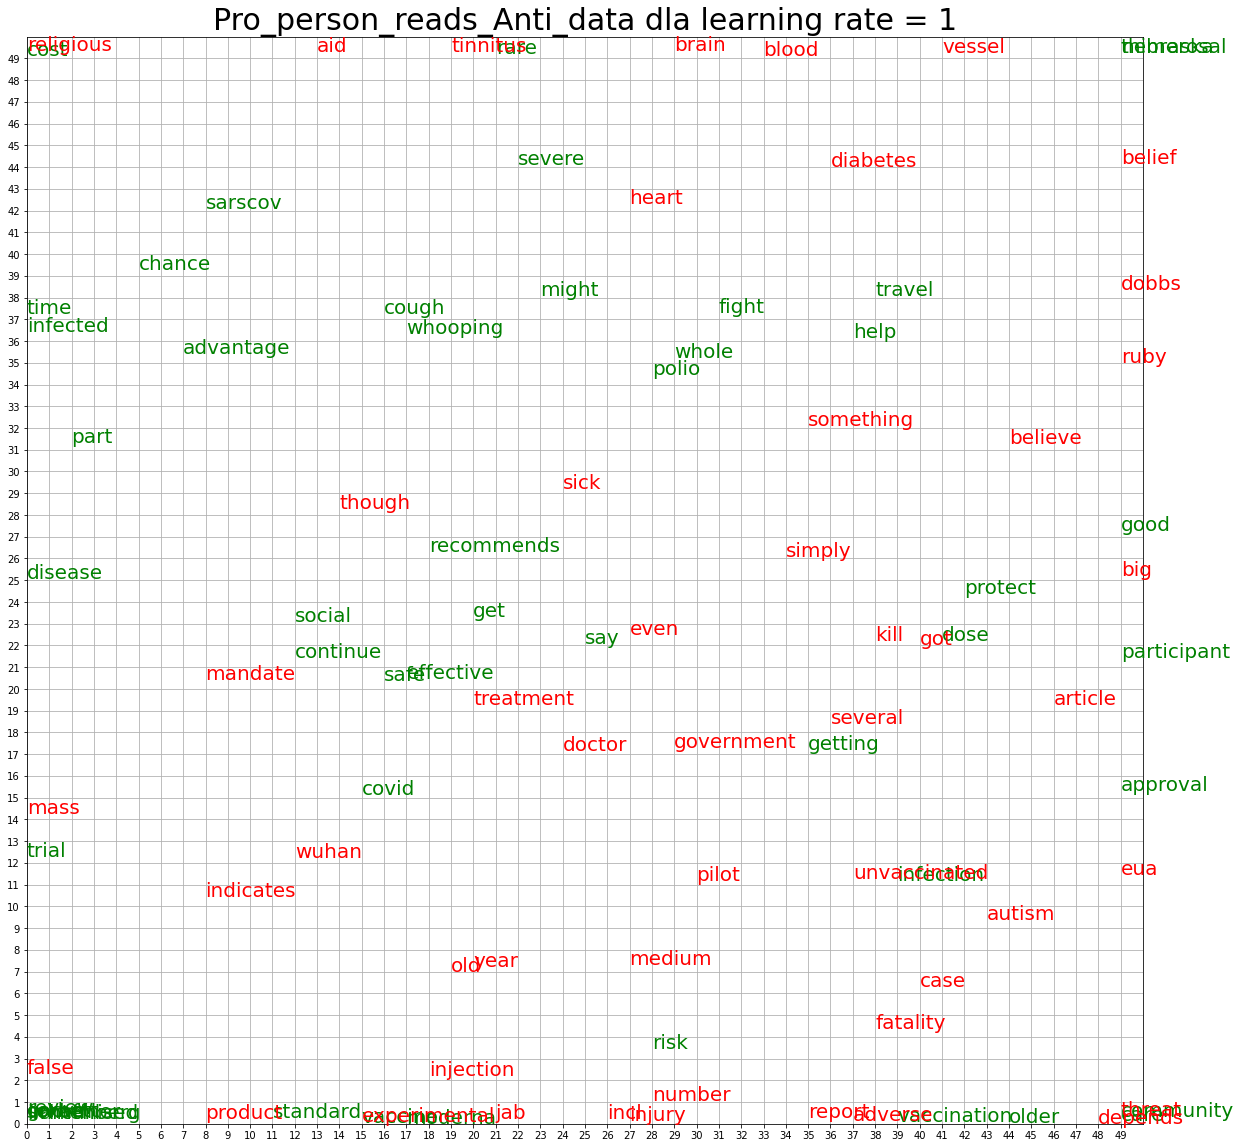

In [5]:
pro_person = Simulation("Pro_person",pro_knowledge_data, key_words, close_words)
pro_person.run(anti_knowledge_data,"Anti_data")

training...
 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 0.7009505579444334
plotting...
learning rate = 0.01
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8849702297609059
plotting...
learning rate = 0.05
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.869236137467375
plotting...
learning rate = 0.1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8595425413639464
plotting...
learning rate = 0.15
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8491495016399978
plotting...
learning rate = 0.25
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8306965139665503
plotting...
learning rate = 0.5
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.7885667370201744
plotting...
learning rate = 1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.7697854017544276
plotting...


knowledge          0.01          0.05           0.1  \
sum_pro    61615.142620  58023.917641  60878.005523  68467.762303   
mean_pro      25.169584     24.036420     25.197850     28.292464   
sum_anti   47325.923685  47584.544514  51162.215193  56131.902257   
mean_anti     19.332485     19.438131     20.933803     23.042653   

                   0.15          0.25           0.5             1  
sum_pro    73701.669001  80458.395584  77155.802179  72235.039144  
mean_pro      30.505658     33.302316     32.094760     30.022876  
sum_anti   59714.702303  61975.182447  71999.988729  74822.332336  
mean_anti     24.473239     25.525199     29.508192     30.614702

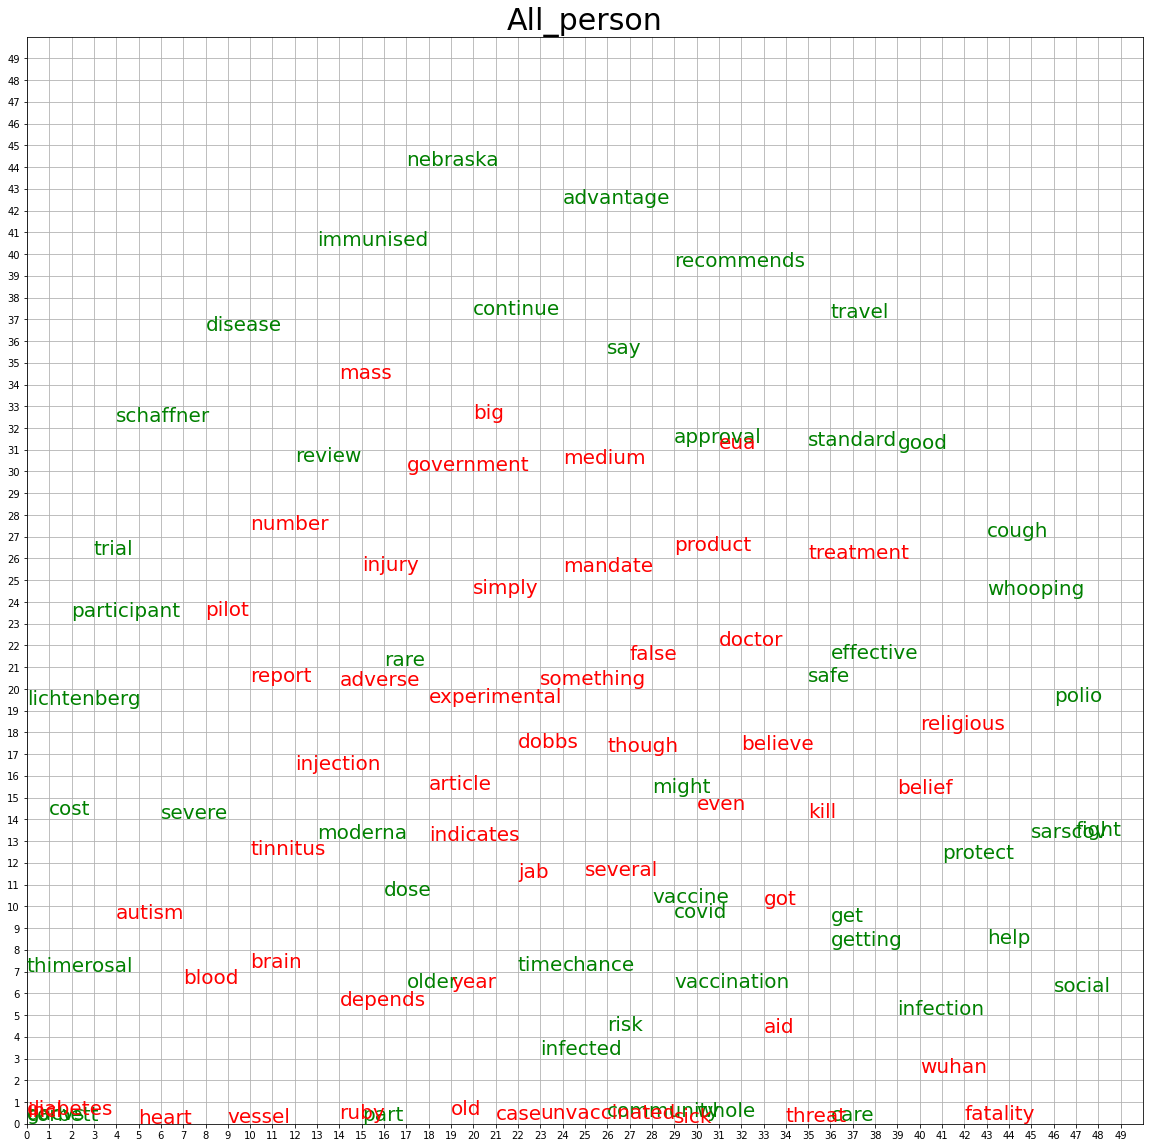

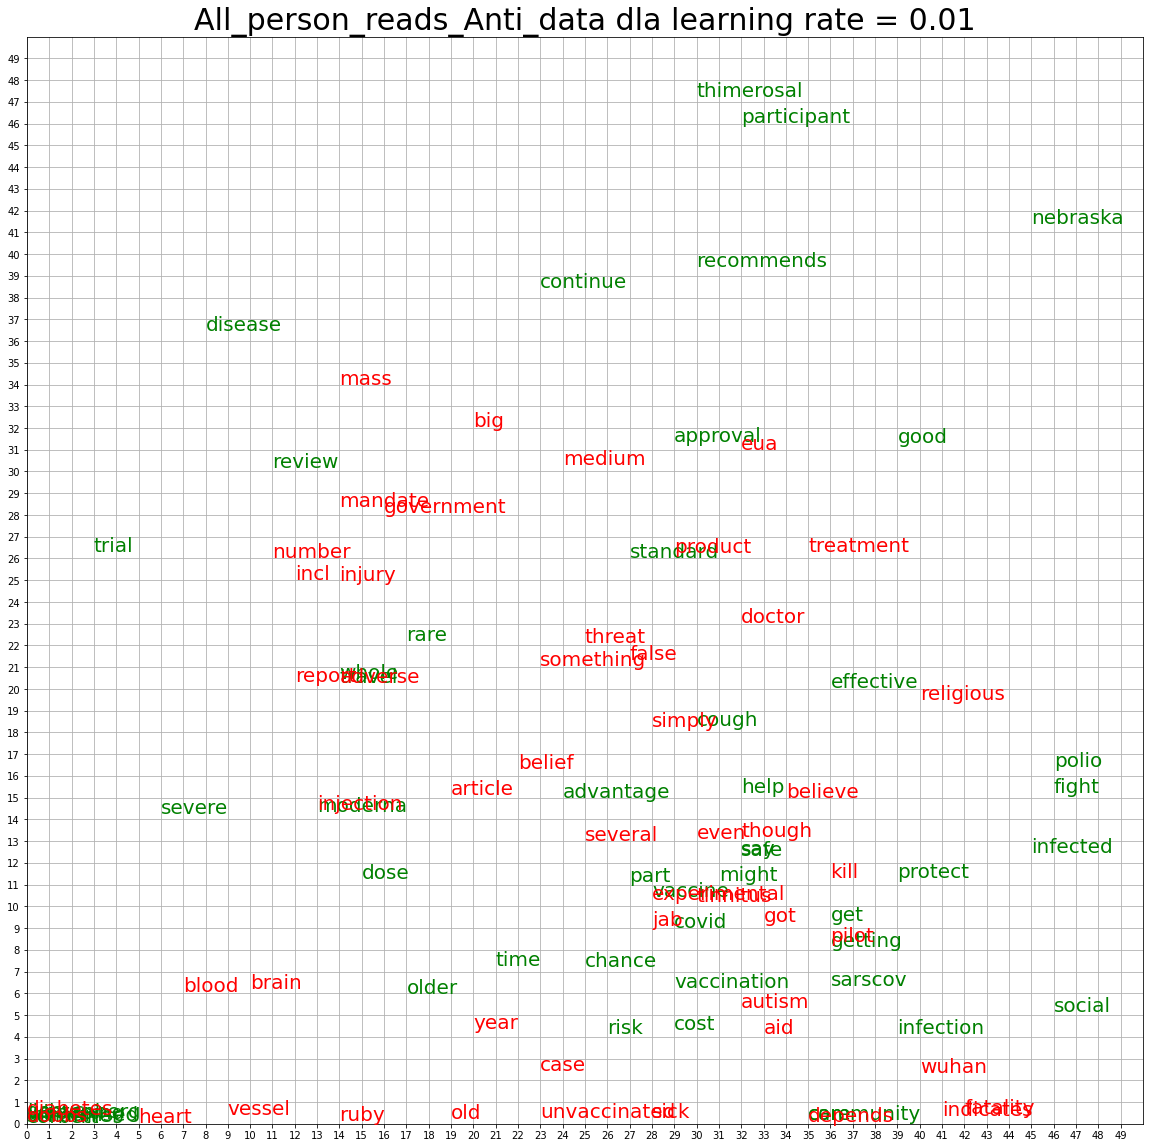

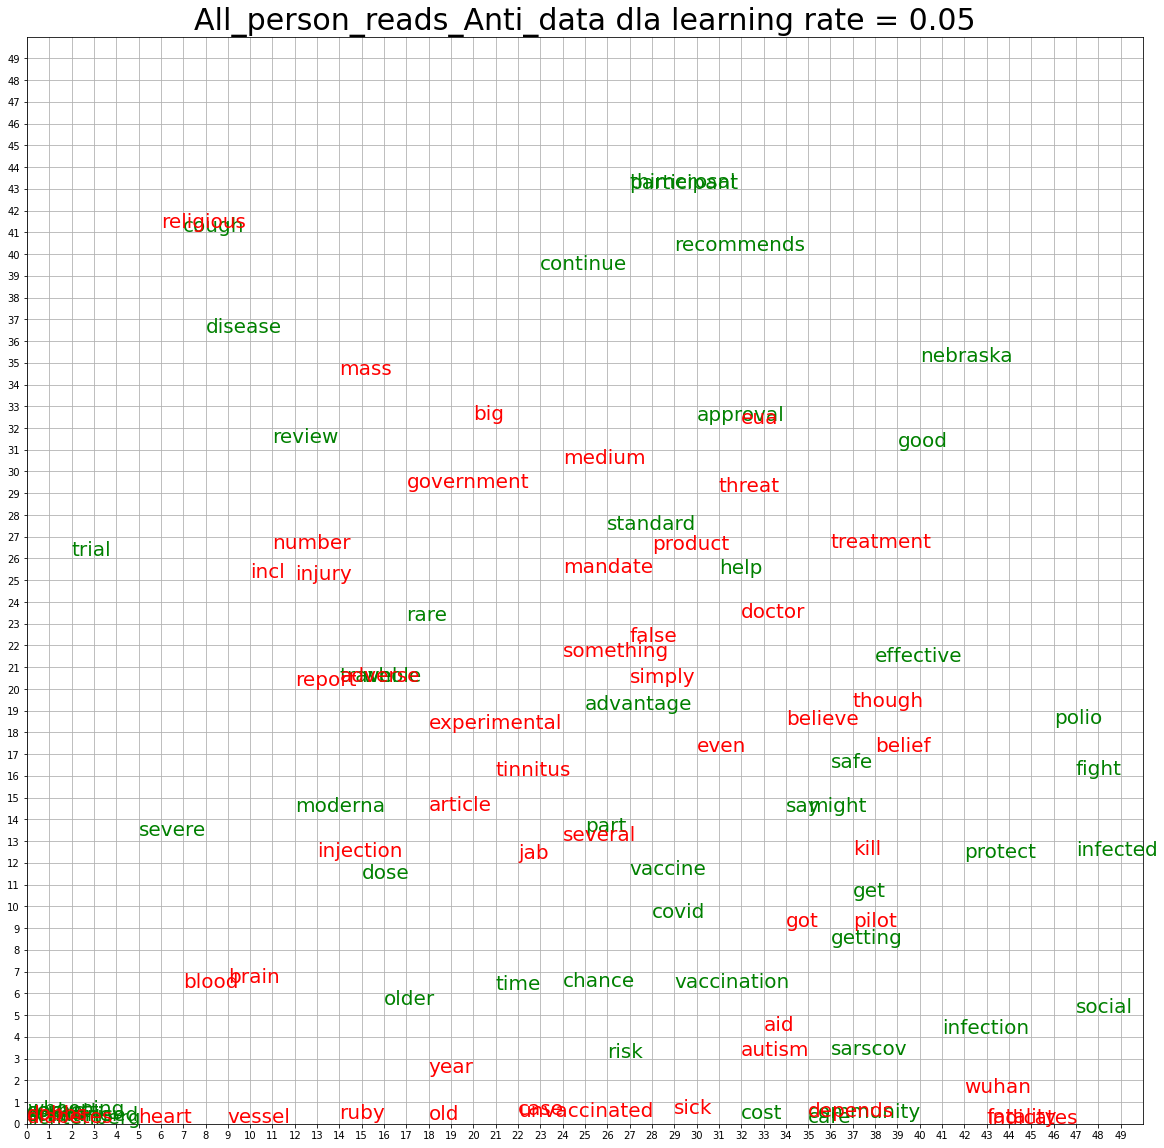

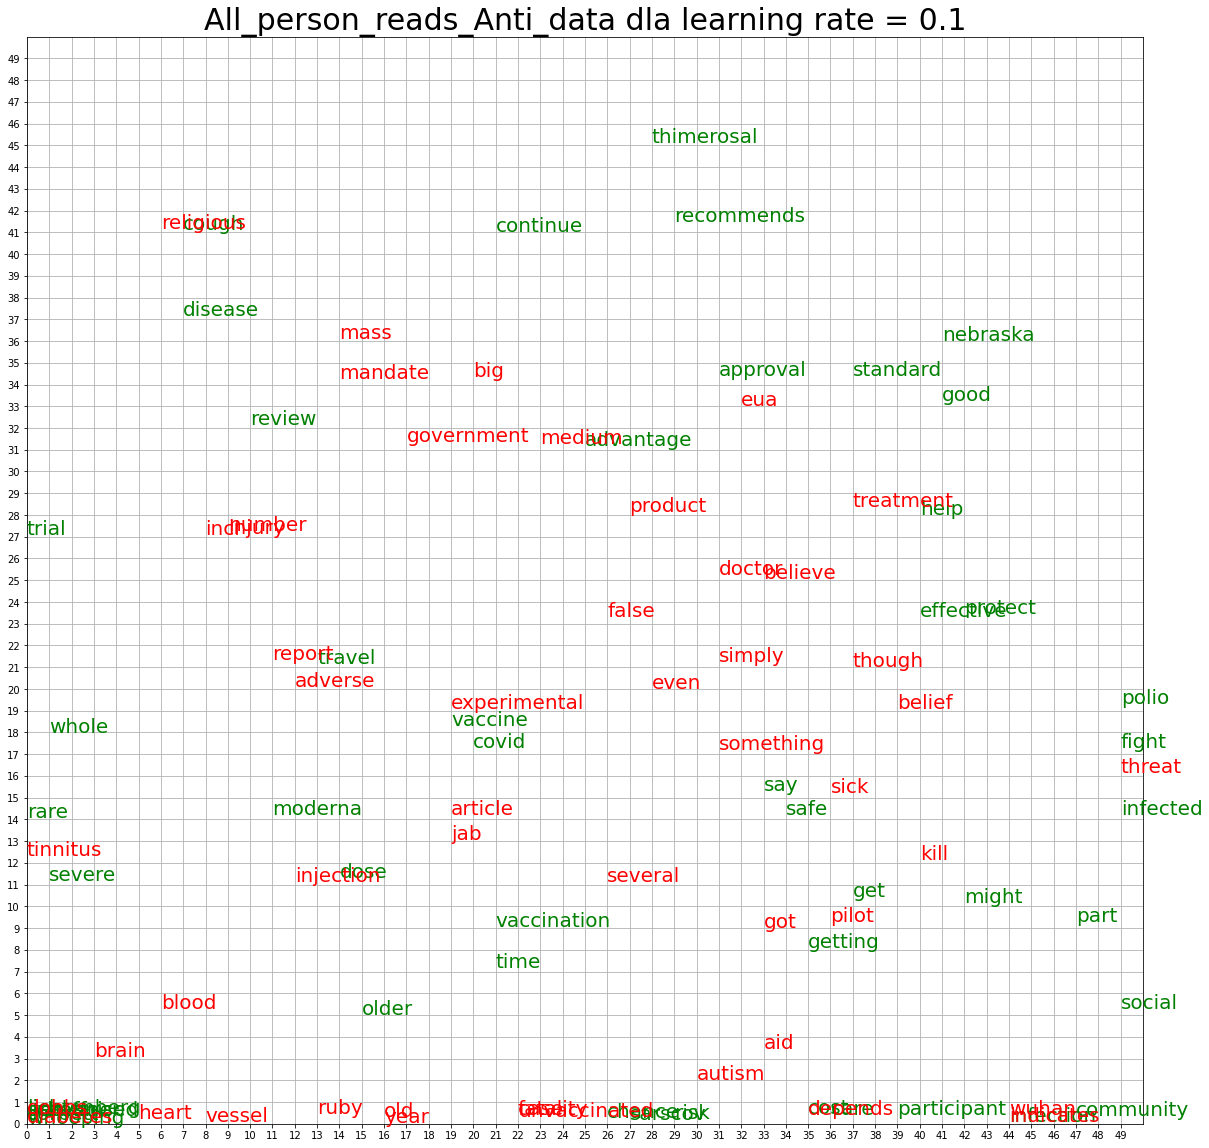

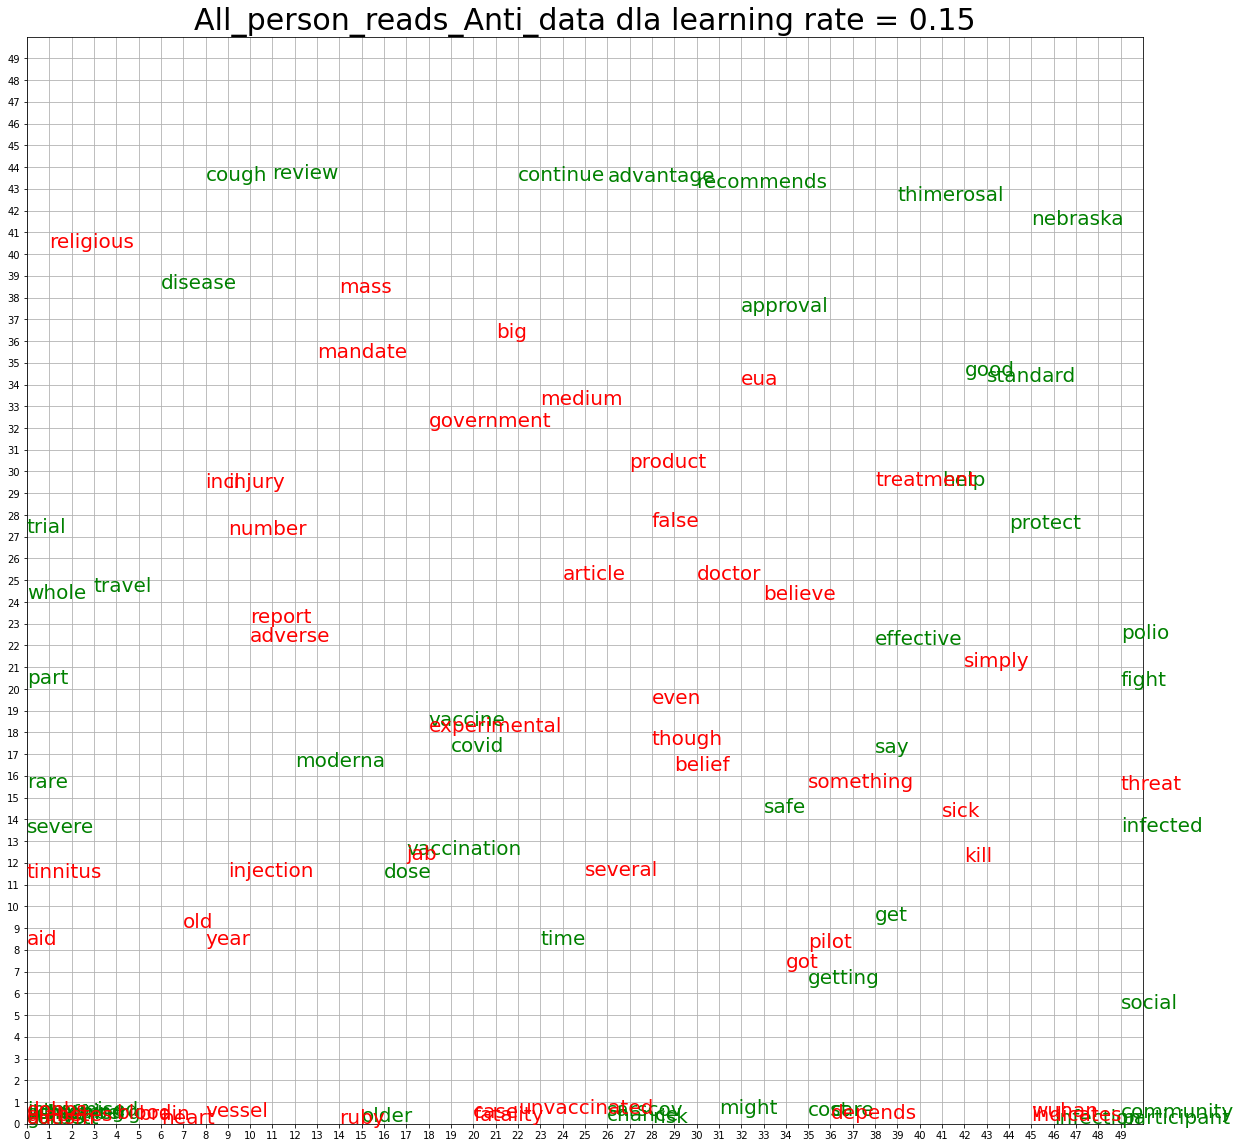

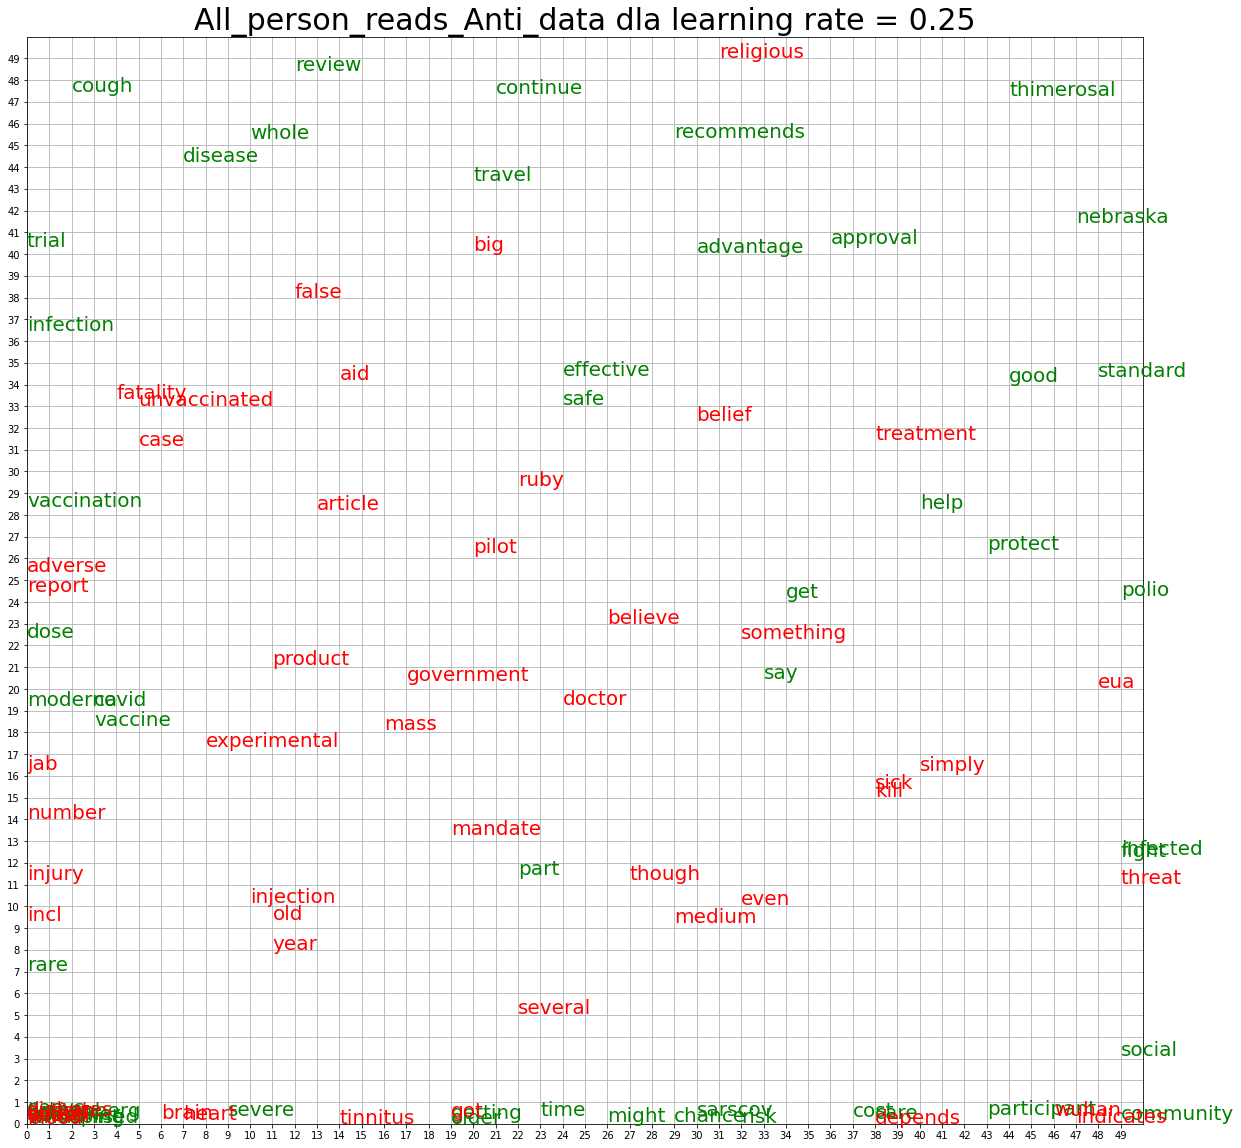

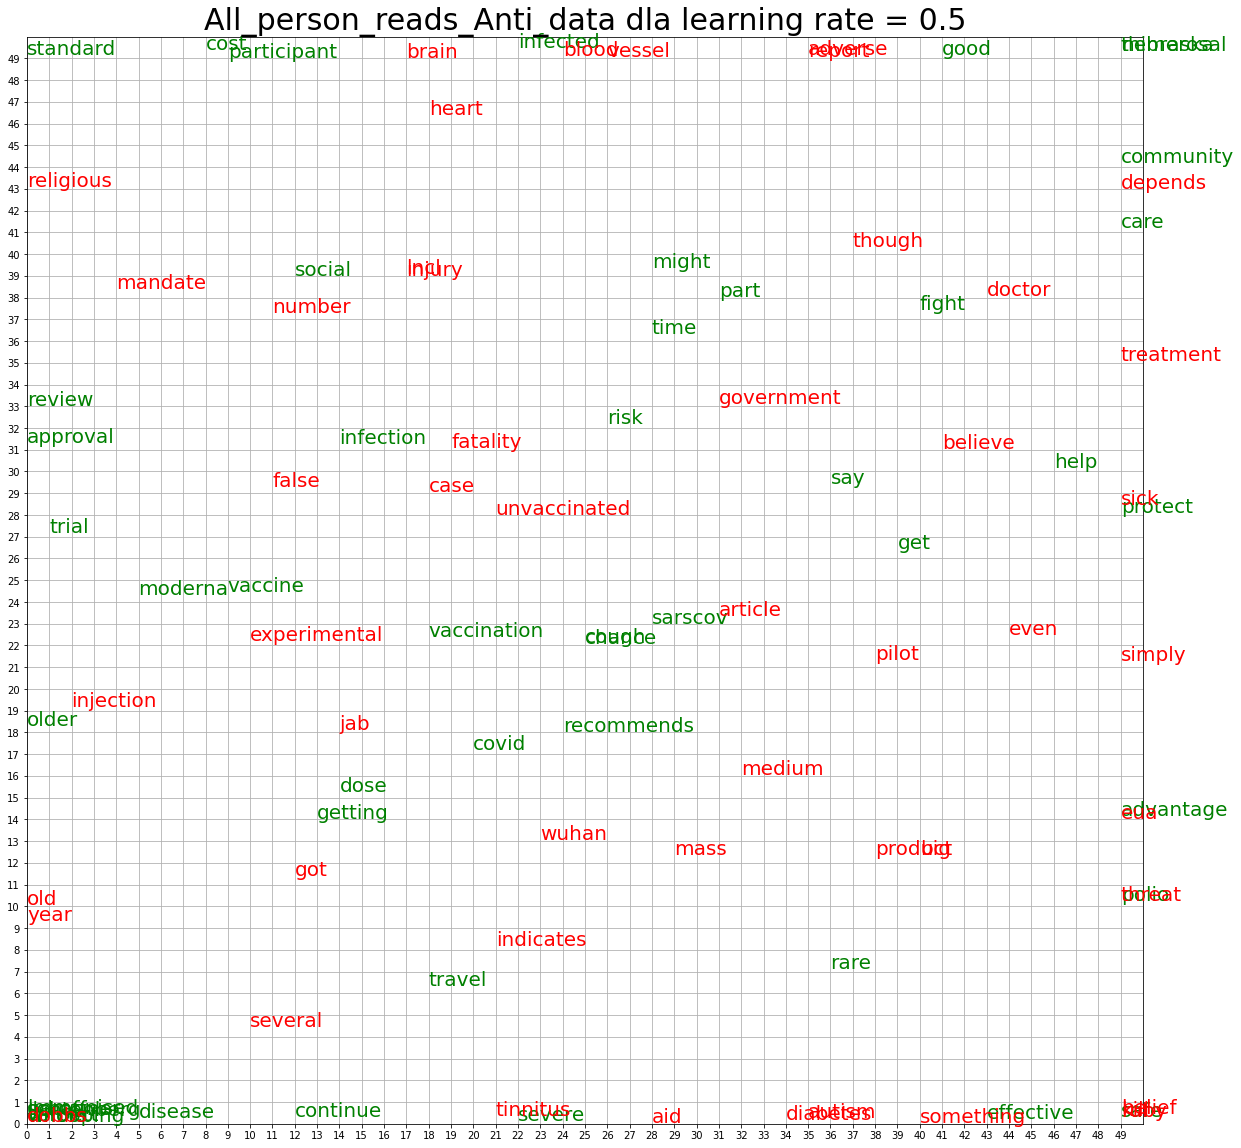

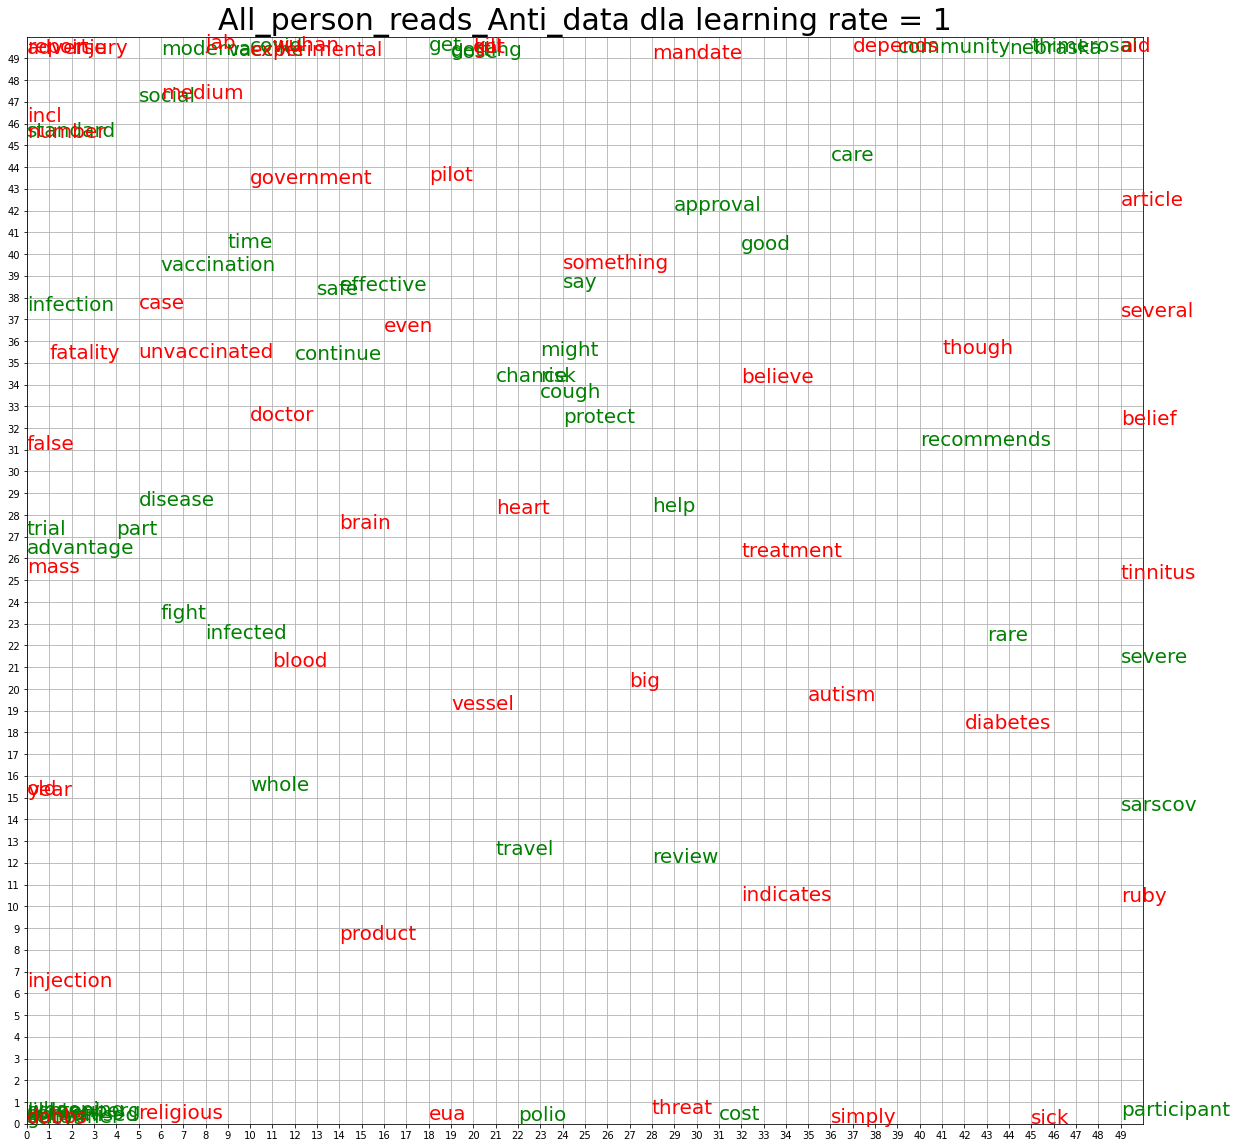

In [6]:
all_person = Simulation("All_person",all_knowledge_data, key_words, close_words)
all_person.run(anti_read_data,"Anti_data")

learning rate = 0.01
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8749127893182838
plotting...
learning rate = 0.05
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8650101639282687
plotting...
learning rate = 0.1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8586486014608561
plotting...
learning rate = 0.15
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8473193456423083
plotting...
learning rate = 0.25
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.8273416222920852
plotting...
learning rate = 0.5
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.797141392598964
plotting...
learning rate = 1
 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.7709879477736302
plotting...


knowledge          0.01          0.05           0.1  \
sum_pro    61615.142620  54956.036770  57550.653944  63198.455748   
mean_pro      25.169584     22.449361     23.509254     25.858615   
sum_anti   47325.923685  54102.804708  55621.078072  62497.509740   
mean_anti     19.332485     22.356531     23.136888     25.954115   

                   0.15          0.25           0.5             1  
sum_pro    69603.159012  72946.251052  65034.882516  67542.901608  
mean_pro      28.479198     29.920530     26.631811     27.749754  
sum_anti   67560.536216  74549.673178  79110.237759  78995.107410  
mean_anti     28.220775     31.192332     32.880398     32.669606

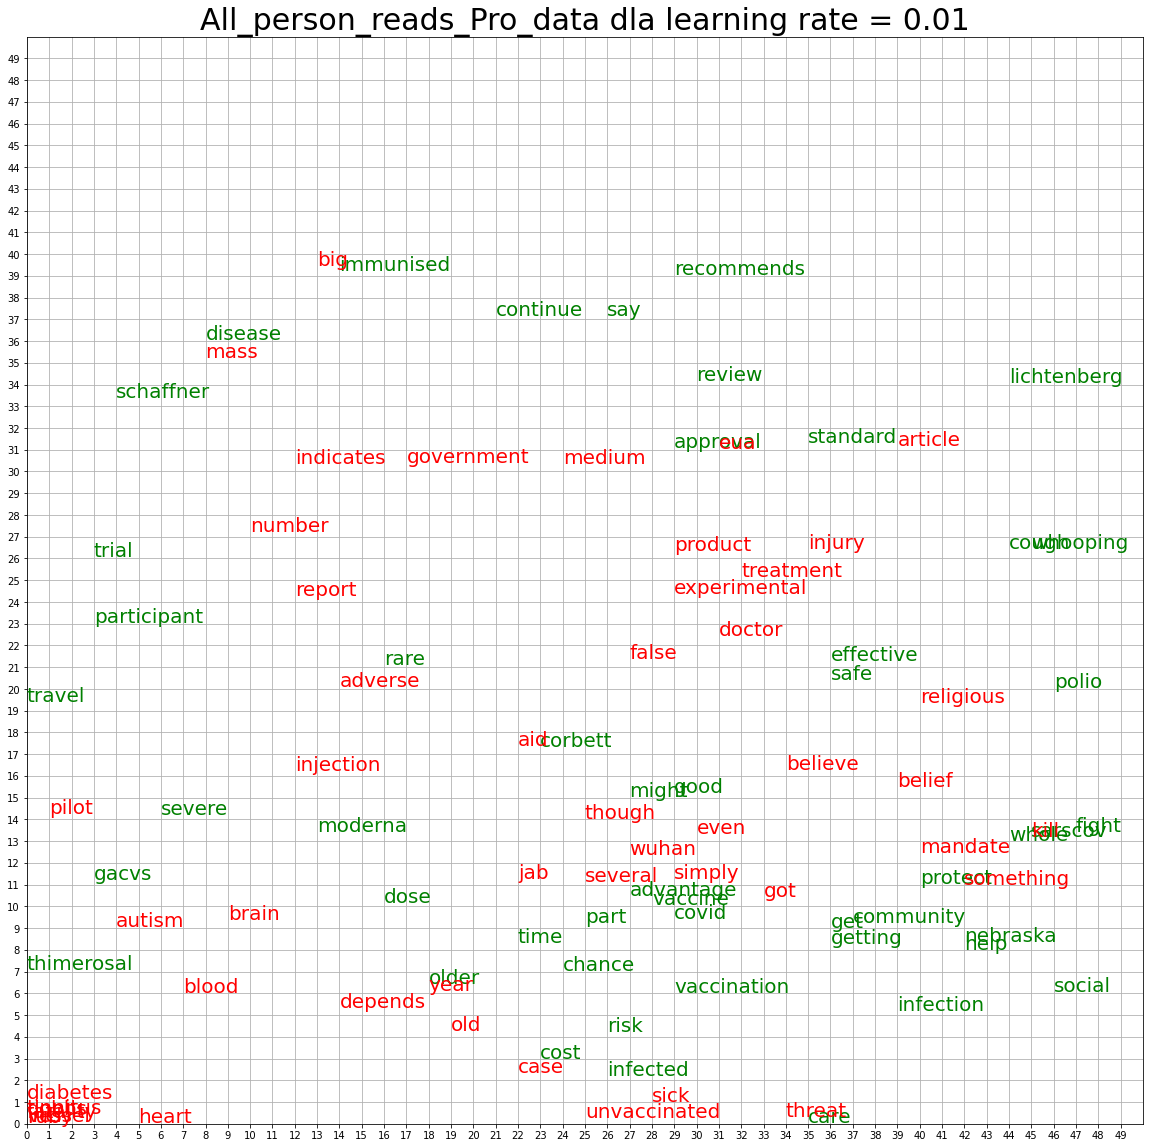

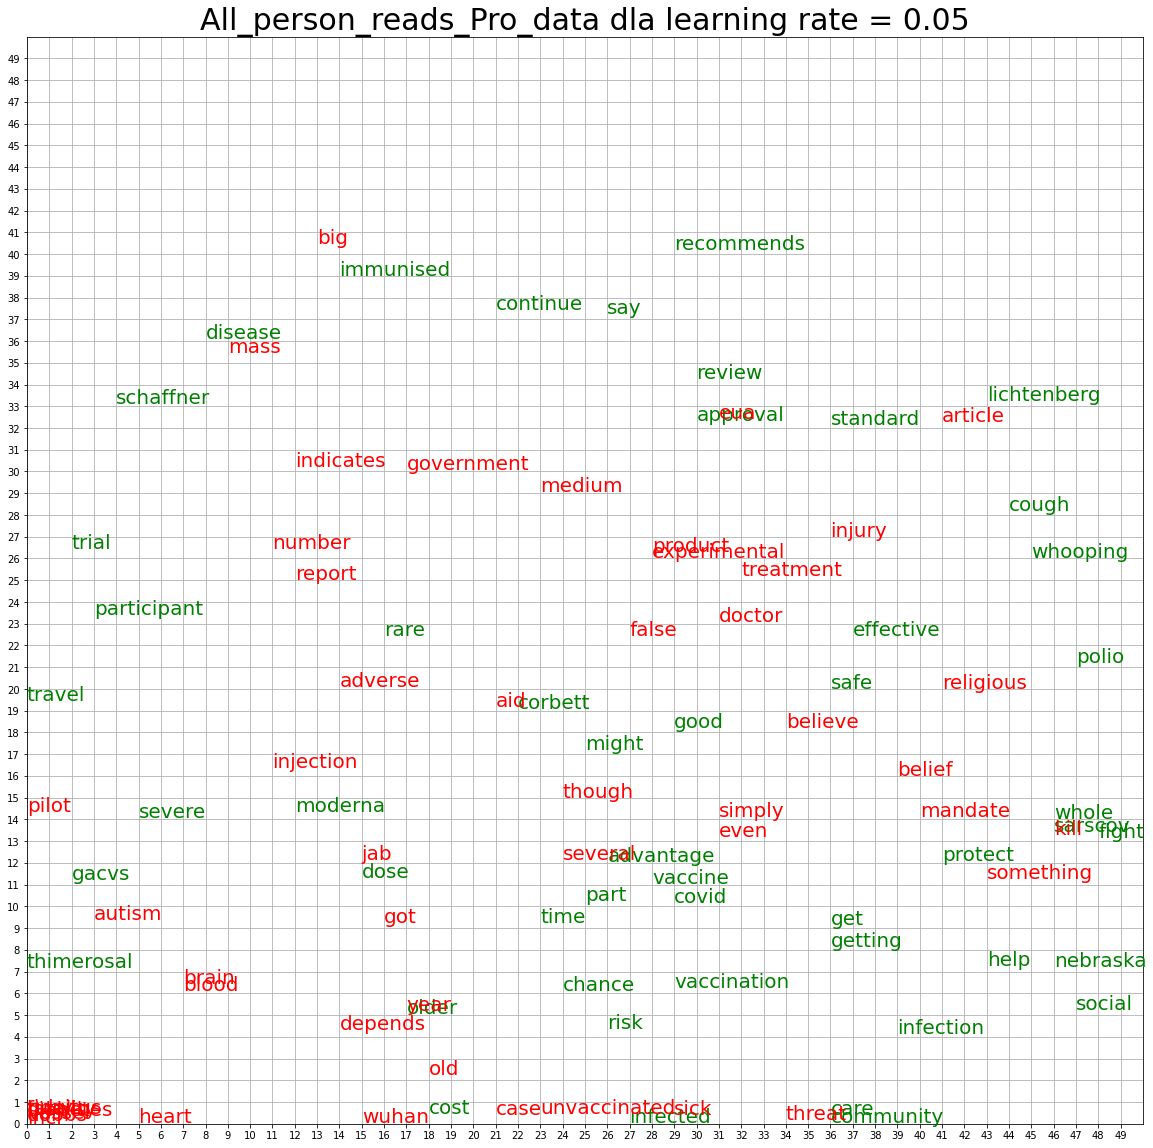

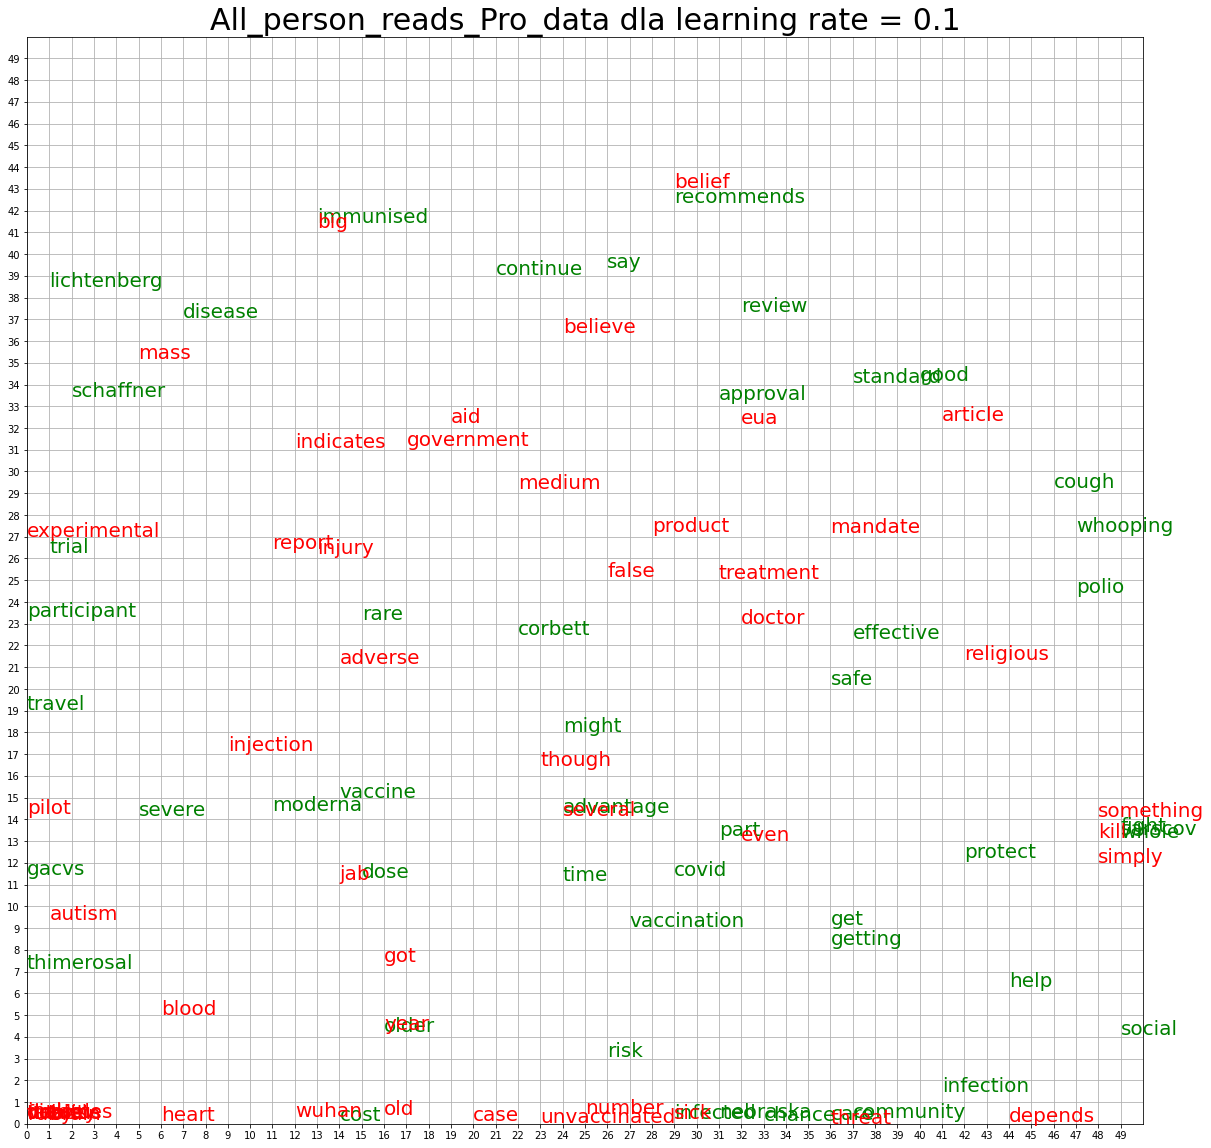

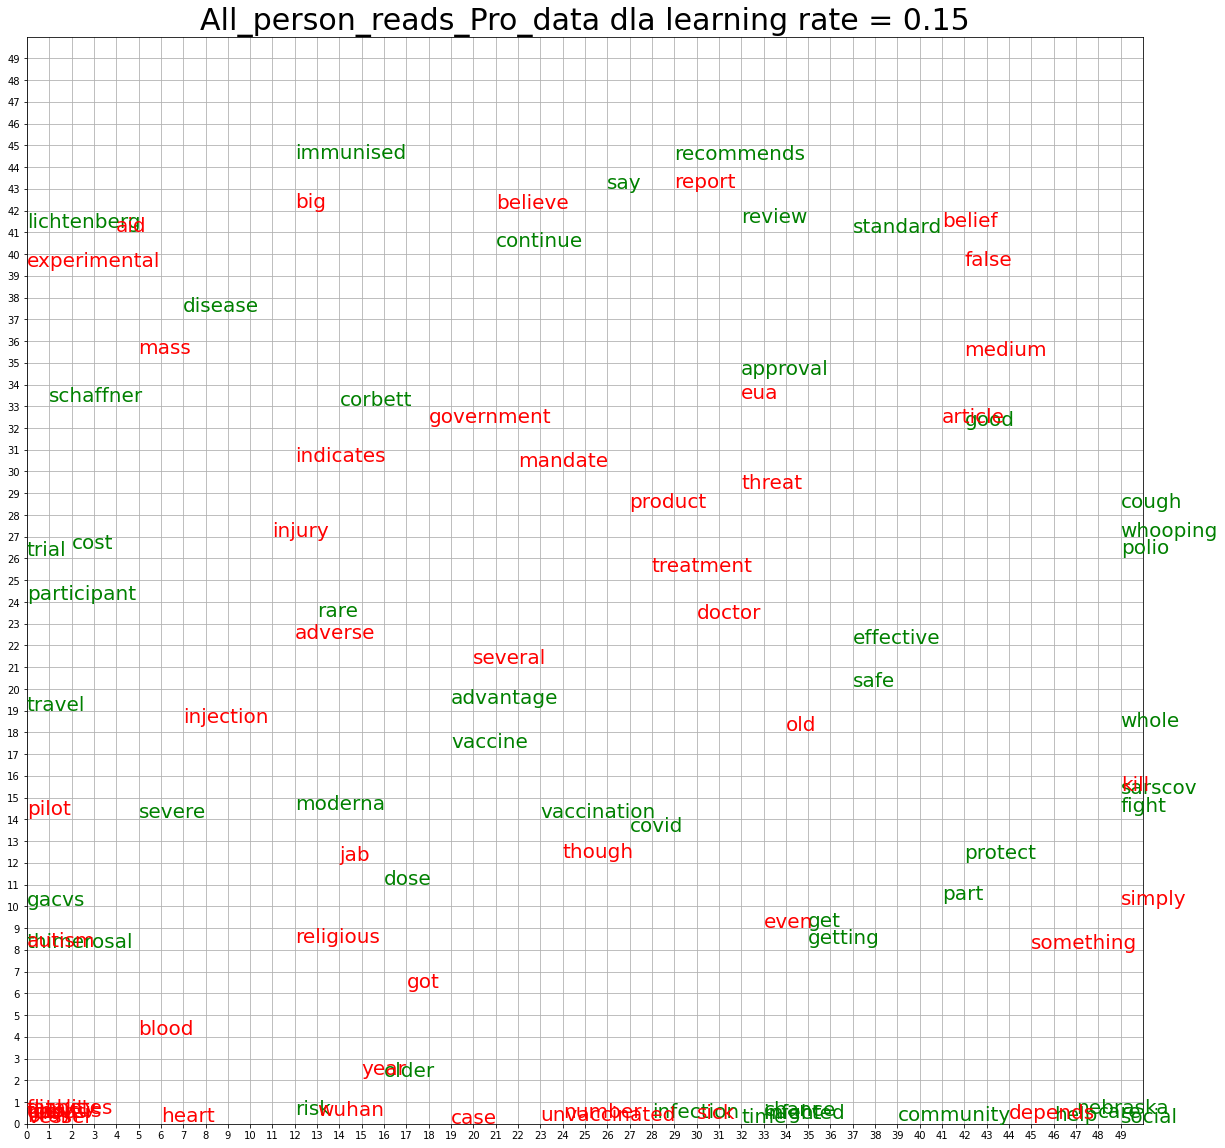

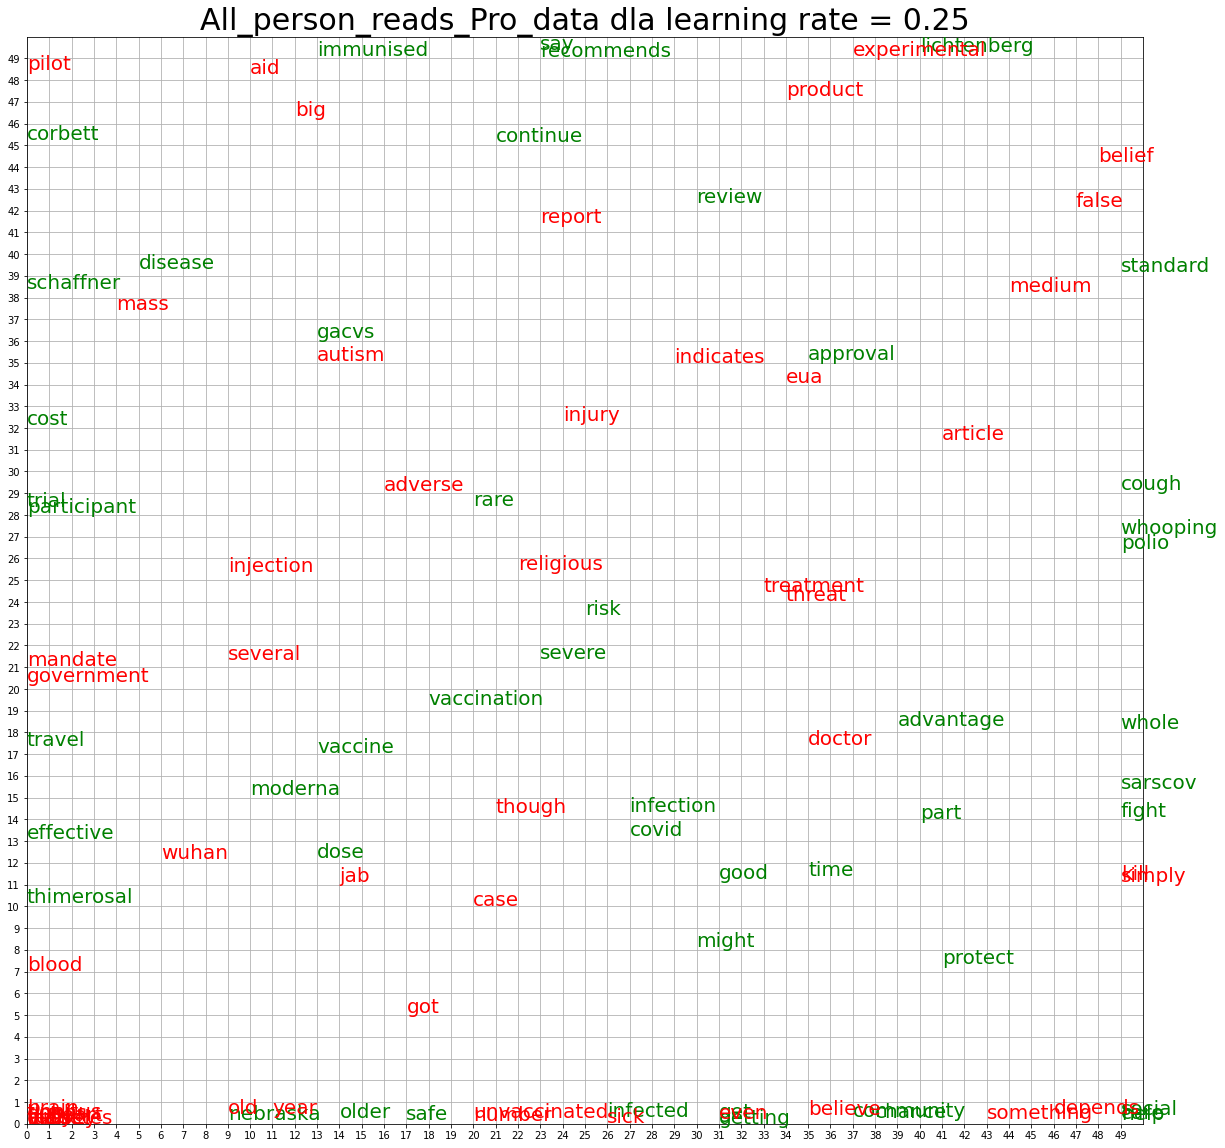

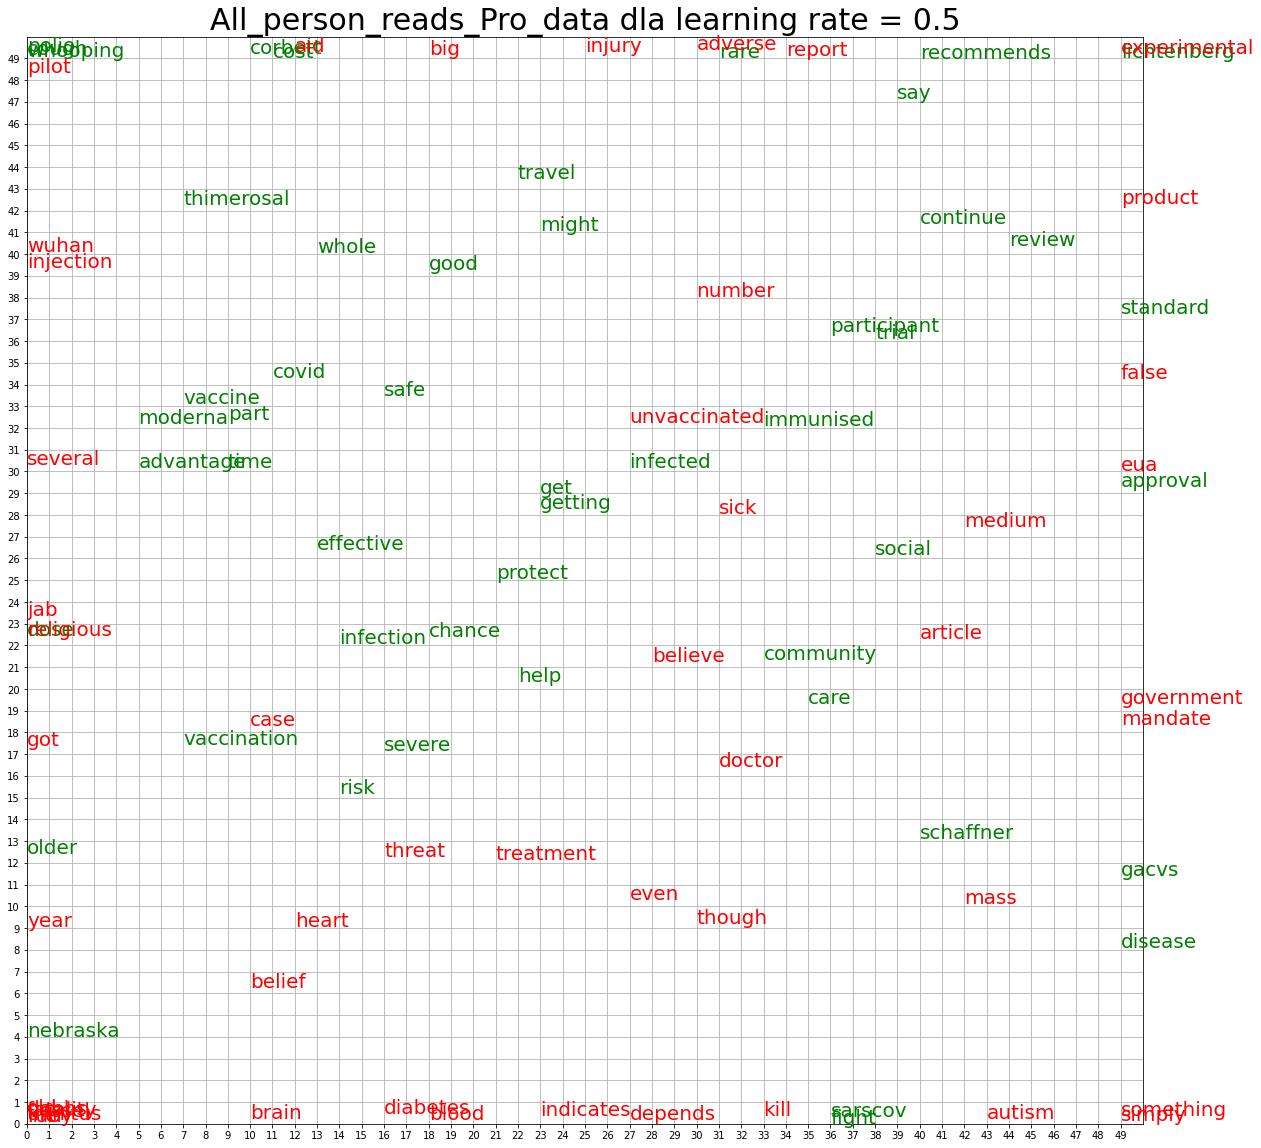

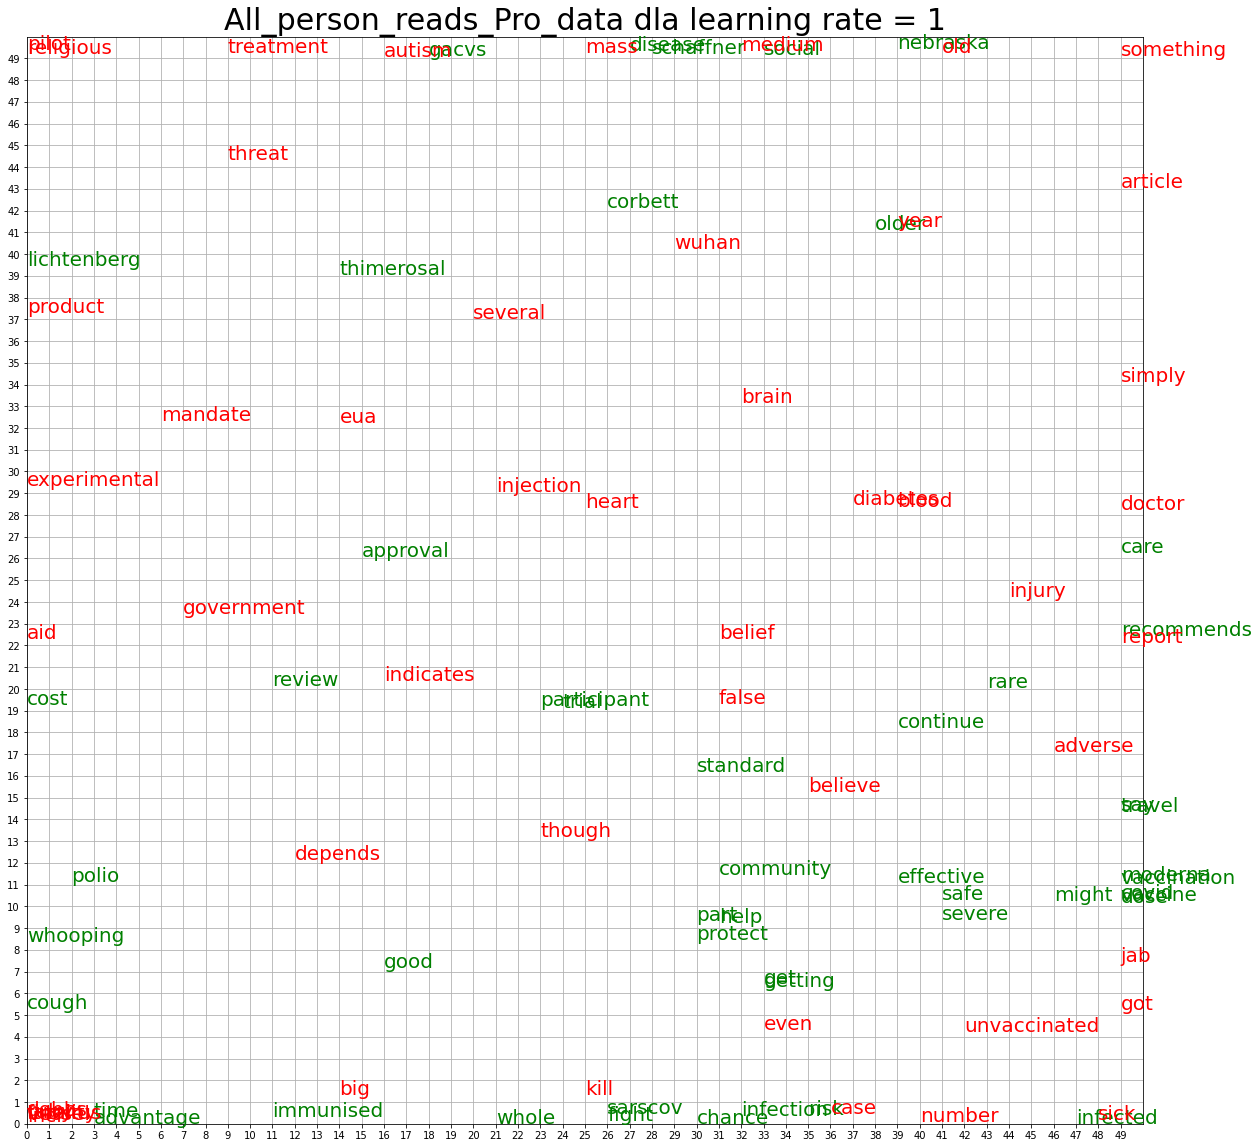

In [7]:
all_person.run(pro_read_data,"Pro_data")